## Deutsche Bahn Call-A-Bike Data Temporal Analysis

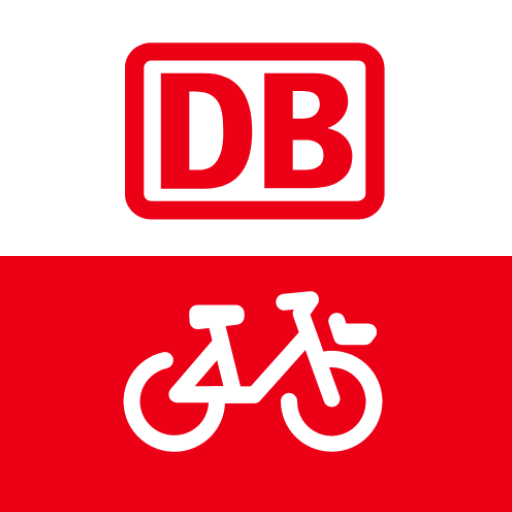



#### 1. Import and examine the data sets
#### 2. Booking Analysis
* 2.1 Bookings by Month
* 2.2 Bookings by Weekday
* 2.3 Bookings by Week
* 2.4 Bookings by Hour
* 2.5 Football Season Heatmaps
* 2.6 Daily Bookings Over Time
#### 3. Customer Analysis
* 3.1 New Customers per Month
* 3.2 Unique Customers per Month
* 3.3 Unique Customers per Weekday
* 3.4 Number of Active Customers
* 3.5 Daily Customers Over Time
#### 4. Bike Analysis
* 4.1 No. of Bikes over Timed
* 4.2 New Bikes per Month
* 4.3 Total No. of Bikes
#### 5. Time Series Analysis
* 5.1 Monthly Bookings
* 5.2 Monthly Customers
#### 6. Trip Duration
* 6.1 Average Trip Duration By Month
* 6.2 Average Trip Duration By Weekday
* 6.3 Average Trip Duration By Hour

## 1. Import and examine the data sets

In [1]:
# Import python libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter

#Import plotly libraries
import plotly.express as px
import plotly.graph_objects as go

#Import time-series analysis libraries
import statsmodels.api as sm

# Define a fixed size for all special charts.
from pylab import rcParams 
rcParams['figure.figsize'] = 16, 6

# Set the plot style
plt.style.use('seaborn-white') 

In [2]:
# set the path and import the data

path = r'/Users/elsaekevall/Documents/Data Science/Correl_Aid/Correl_Aid_Hackathon/DB_Data/Data'
df_biketrips = pd.read_pickle(os.path.join(path, 'biketrips_stations.pkl'))

In [3]:
# view first 25 rows

df_biketrips.head(25)

,index,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,date_from,date_to,...,Month,Week,Weekday,day_trip,customer_trips,user_type,avg_customers_day,station_type,bike_relocated,bike_inserted
0,0,21366843,143517,A821059B555C7764A2FF801180874A2FCB326222,2014-01-01 00:34:54,2014-01-01 00:50:14,214170,131880,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,7,Typical,56.0,Busy,False,True
1,1,21367069,119830,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,2014-01-01 01:39:55,2014-01-01 01:57:27,131646,131648,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,59,Frequent,73.0,Busy,False,False
2,2,21367072,143501,7AD2C1B70137479062A6DD73815835986677BB2D,2014-01-01 01:40:20,2014-01-01 01:53:09,211922,138376,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,183,High,30.0,Typical,False,True
3,3,21367155,108641,4F4F752203EA6FC872D576E9289C4E1B362E16F6,2014-01-01 02:05:55,2014-01-01 02:13:49,140799,211923,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,174,High,92.0,Busy,False,False
4,4,21367221,143829,FEA7FF33A3252EE99E58B9E15724AA861CAB1DDF,2014-01-01 02:29:03,2014-01-01 02:32:41,208295,213833,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,210,High,40.0,Typical,False,False
5,5,21367381,143552,60A788942F6A49BF54DB9013DB05428F897FCCCE,2014-01-01 03:07:07,2014-01-01 03:20:08,208292,212607,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,18,Typical,54.0,Busy,False,True
6,6,21367723,143577,708275C3A732D3BD47E97F1E0AC3AE01735FA170,2014-01-01 04:27:51,2014-01-01 04:45:18,200502,198086,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,180,High,63.0,Busy,False,True
7,7,21367824,143580,4FCAC2DAFF984CC2FFC85D0B87D577D266010745,2014-01-01 04:58:33,2014-01-01 05:12:31,213680,201326,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,54,Frequent,33.0,Typical,False,False
8,8,21366959,119948,092D25BAD64832AE3F69488573BA5C398C25B51D,2014-01-01 01:08:18,2014-01-01 01:13:02,140804,198086,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,58,Frequent,60.0,Busy,False,True
9,9,21366990,120207,528147DF06D7074EA517BFAE244FC0E25CB2637C,2014-01-01 01:17:32,2014-01-01 01:21:45,138389,131873,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,271,High,43.0,Typical,False,True


In [4]:
# view last 25 rows

df_biketrips.tail(25)

,index,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,date_from,date_to,...,Month,Week,Weekday,day_trip,customer_trips,user_type,avg_customers_day,station_type,bike_relocated,bike_inserted
8265290,8265290,46379667,117256,39F4E52592419938DE8906E955B8060E057DE78D,2017-05-15 20:41:50,2017-05-15 20:51:03,140801,208295,2017-05-15,2017-05-15,...,May,20,Monday,yes,343,High,39.0,Typical,True,False
8265291,8265291,46379702,119968,7111FF009F27E815EC4D2E1B5E046411906DEB2F,2017-05-15 20:43:17,2017-05-15 20:52:00,131646,213856,2017-05-15,2017-05-15,...,May,20,Monday,yes,105,High,73.0,Busy,False,False
8265292,8265292,46381067,143772,29DF9BC7C5582F28A33B959778D3532738593728,2017-05-15 21:36:41,2017-05-15 21:49:46,252492,213235,2017-05-15,2017-05-15,...,May,20,Monday,yes,9,Typical,33.0,Typical,False,False
8265293,8265293,46382537,117550,6A7E1EA7421B080A4A83F7F9E4FABF0B214BC828,2017-05-15 22:50:50,2017-05-15 23:16:11,171372,138387,2017-05-15,2017-05-15,...,May,20,Monday,yes,18,Typical,21.0,Typical,True,False
8265294,8265294,46382994,119958,114E560D4364344FEF804CA8047C3DD0E81D7FDD,2017-05-15 23:25:22,2017-05-15 23:40:36,138375,248511,2017-05-15,2017-05-15,...,May,20,Monday,yes,40,Frequent,25.0,Typical,True,False
8265295,8265295,46383356,143585,FA1596CDD83D286B363E839C01C89991E286C452,2017-05-15 23:58:04,2017-05-16 00:07:20,198077,131547,2017-05-15,2017-05-16,...,May,20,Monday,no,80,High,135.0,High,True,False
8265296,8265296,46379905,119673,714A0E29AF0213C7AAE9866989D4277117A70A23,2017-05-15 20:50:55,2017-05-15 21:11:18,131872,131648,2017-05-15,2017-05-15,...,May,20,Monday,yes,2,Low,81.0,Busy,False,False
8265297,8265297,46381737,107852,DBDF4D7D3898EA4D7683681D793874E3022E9CC1,2017-05-15 22:06:44,2017-05-15 22:17:44,245204,208307,2017-05-15,2017-05-15,...,May,20,Monday,yes,48,Frequent,30.0,Typical,True,False
8265298,8265298,46381791,107772,D7E83AD73A65907AB8C9EEDE50F66842ACAF711A,2017-05-15 22:09:12,2017-05-15 22:18:07,140801,204031,2017-05-15,2017-05-15,...,May,20,Monday,yes,50,Frequent,39.0,Typical,False,False
8265299,8265299,46381994,143538,2970007E56BBF9AD90E0E6E4CC0FEECD00419F0B,2017-05-15 22:18:17,2017-05-15 22:28:08,131889,244944,2017-05-15,2017-05-15,...,May,20,Monday,yes,72,High,61.0,Busy,False,False


In [5]:
# find the data types

df_biketrips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8265315 entries, 0 to 8265314
Data columns (total 31 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   index                  int64         
 1   booking_hal_id         object        
 2   vehicle_hal_id         object        
 3   customer_hal_id        object        
 4   datetime_from          datetime64[ns]
 5   datetime_to            datetime64[ns]
 6   start_station_id       object        
 7   end_station_id         object        
 8   date_from              datetime64[ns]
 9   date_to                datetime64[ns]
 10  hour_from              int64         
 11  hour_to                int64         
 12  duration_trip_minutes  float64       
 13  station_status         object        
 14  start_longitude        float64       
 15  start_latitude         float64       
 16  end_longitude          float64       
 17  end_latitude           float64       
 18  start_station         

In [6]:
# count the unique values in the columns

df_biketrips.nunique()

index                    8265315
booking_hal_id           8265315
vehicle_hal_id              2681
customer_hal_id           262527
datetime_from            7716931
datetime_to              7703108
start_station_id             208
end_station_id               208
date_from                   1231
date_to                     1232
hour_from                     24
hour_to                       24
duration_trip_minutes      28002
station_status                 3
start_longitude              206
start_latitude               205
end_longitude                206
end_latitude                 205
start_station                206
end_station                  206
Year                           4
Month                         12
Week                          53
Weekday                        7
day_trip                       2
customer_trips              1069
user_type                      4
avg_customers_day             75
station_type                   4
bike_relocated                 2
bike_inser

In [7]:
# find the number of rows and columns

df_biketrips.shape

(8265315, 31)

The dataframe matches the data that was exported.

## 2. Booking Analysis

#### Change the working directory

In [8]:
# Change the working directory to save the pictures and show directory path

os.chdir(path = r'/Users/elsaekevall/Documents/Data Science/Correl_Aid/Correl_Aid_Hackathon/DB_Data/Analysis')
os.getcwd()

'/Users/elsaekevall/Documents/Data Science/Correl_Aid/Correl_Aid_Hackathon/DB_Data/Analysis'

### 2.1 Bookings by Month

In [9]:
# Calculate the distribution of bookings by month

monthly_distribution = df_biketrips['Month'].value_counts()
monthly_distribution.sort_values(ascending=False)

May          922378
July         875091
April        873537
August       872290
June         833890
September    785639
March        708189
October      626449
February     478772
November     477790
January      436673
December     374617
Name: Month, dtype: int64

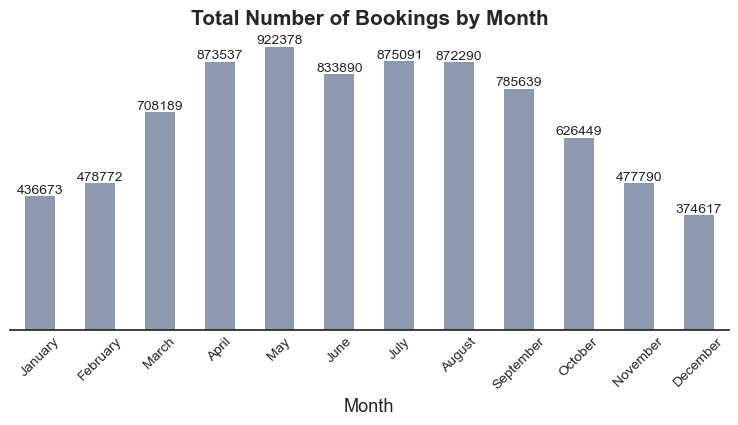

In [10]:
# Plot the monthly distribution of bookings

# Define the order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a bar chart of monthly distribution for all bookings
fg = df_biketrips['Month'].value_counts().reindex(month_order).plot.bar(figsize = (8,4), color = ['#8D99AE'])
plt.tight_layout()

# remove the top and right spines
fg.spines['top'].set_visible(False)
fg.spines['right'].set_visible(False)
fg.spines['left'].set_visible(False)

#Set titles and axes
plt.xlabel('Month', fontsize = 13)
plt.title('Total Number of Bookings by Month', fontsize = 15, fontweight = 'semibold')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks([])  # Remove y-axis tick labels

# Display the plot with ticks on the x and y axes
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=False, right=False)

# Add text annotations for each bar
for bar in fg.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plt.text(x, y, y, ha='center', va='bottom', fontsize = 10)

# Exporting the figure
plt.savefig("bookings_by_month.png", bbox_inches='tight') 

plt.show()

In [11]:
# Calculate the average monthly distribution of bookings

avg_monthly = df_biketrips.groupby(['Year', 'Month'])['booking_hal_id'].count().groupby('Month').mean().round()
avg_monthly

Month
April        218384.0
August       290763.0
December     124872.0
February     119693.0
January      109168.0
July         291697.0
June         277963.0
March        177047.0
May          230594.0
November     159263.0
October      208816.0
September    261880.0
Name: booking_hal_id, dtype: float64

In [12]:
# Calculate the average monthly distribution of bookings

med_monthly = df_biketrips.groupby(['Year', 'Month'])['booking_hal_id'].count().groupby('Month').median().round()
med_monthly

Month
April        219718.0
August       304874.0
December     147155.0
February     122350.0
January      106190.0
July         275643.0
June         273316.0
March        170964.0
May          228876.0
November     155652.0
October      204465.0
September    228461.0
Name: booking_hal_id, dtype: float64

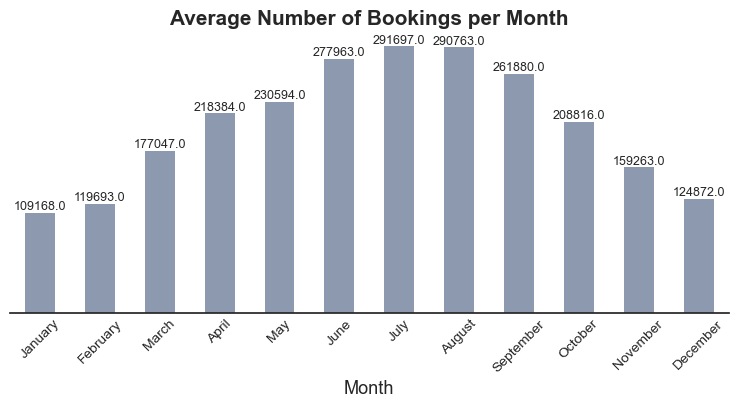

In [13]:
# Plot the average monthly distribution of bookings

# Define the order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a bar chart of average monthly distribution for all bookings
fg = avg_monthly.reindex(month_order).plot.bar(figsize = (8,4), color = ['#8D99AE'])
plt.tight_layout()

# remove the top and right spines
fg.spines['top'].set_visible(False)
fg.spines['right'].set_visible(False)
fg.spines['left'].set_visible(False)

#Set titles and axes
plt.xlabel('Month', fontsize = 13)
plt.title('Average Number of Bookings per Month', fontsize = 15, fontweight = 'semibold')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks([])  # Remove y-axis tick labels

# Display the plot with ticks on the x and y axes
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=False, right=False)

# Add text annotations for each bar
for bar in fg.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plt.text(x, y, y, ha='center', va='bottom', fontsize = 9)

# Exporting the figure
plt.savefig("avg_bookings_by_month.png", bbox_inches='tight') 

plt.show()

<Figure size 1200x600 with 0 Axes>

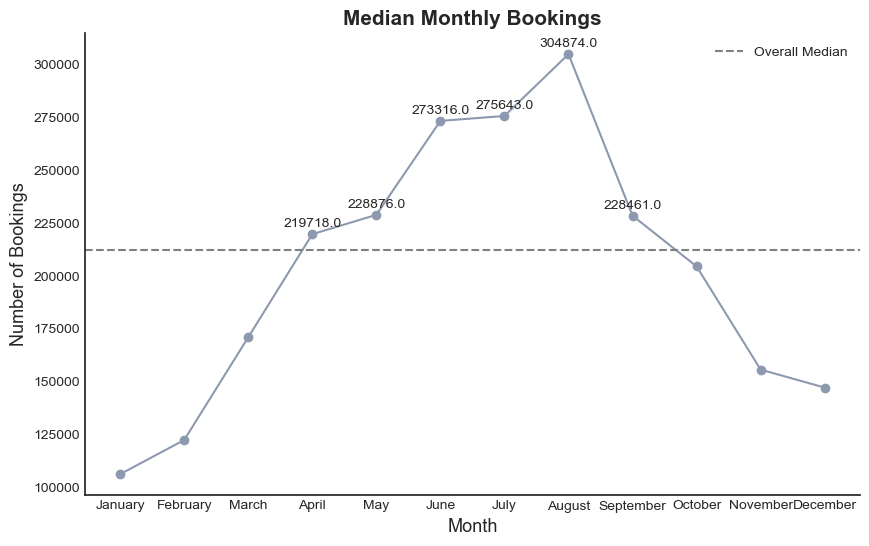

In [14]:
# Calculate the frequency of bookings for each month

monthly_median = med_monthly.loc[month_order]

# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set_style('white')

# Plot the distribution of bookings throughout the day
plt.figure(figsize=(10, 6))
plt.plot(monthly_median.index, monthly_median.values, marker='o', color = '#8D99AE')
plt.axhline(y=monthly_median.median(), color='grey', linestyle='--', label='Overall Median')
plt.xlabel('Month', fontsize = 13)
plt.ylabel('Number of Bookings', fontsize = 13)
plt.title('Median Monthly Bookings', fontsize = 15, fontweight = 'semibold')
plt.legend()

# Identify peak hours or periods of high demand 
peak_months =monthly_median[monthly_median > monthly_median.median()]
for month, count in peak_months.items():
    plt.annotate(f'{count}', xy=(month, count), xytext=(0, 5), textcoords='offset points', ha='center')

# Remove the grid and spines (axis lines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(False)
    
# Exporting the correlation heatmap
plt.savefig("freq_bookings_by_month.png", bbox_inches='tight') 

# Display the plot
plt.show()

In [15]:
# Calculate the monthly distribution of bookings by year

monthly = df_biketrips.groupby(['Year', 'Month'])['booking_hal_id'].count()
monthly

Year  Month    
2014  April        205811
      August       245853
      December      77419
      February     113086
      January       94775
      July         275023
      June         242233
      March        179019
      May          230737
      November     147831
      October      204465
      September    228461
2015  April        197648
      August       304874
      December     150043
      February     101256
      January      102397
      July         275643
      June         273316
      March        140075
      May          227014
      November     155652
      October      196812
      September    225987
2016  April        236453
      August       321563
      December     147155
      February     131615
      January      109982
      July         324425
      June         318341
      March        162909
      May          324275
      November     174307
      October      225172
      September    331191
2017  April        233625
      February     132

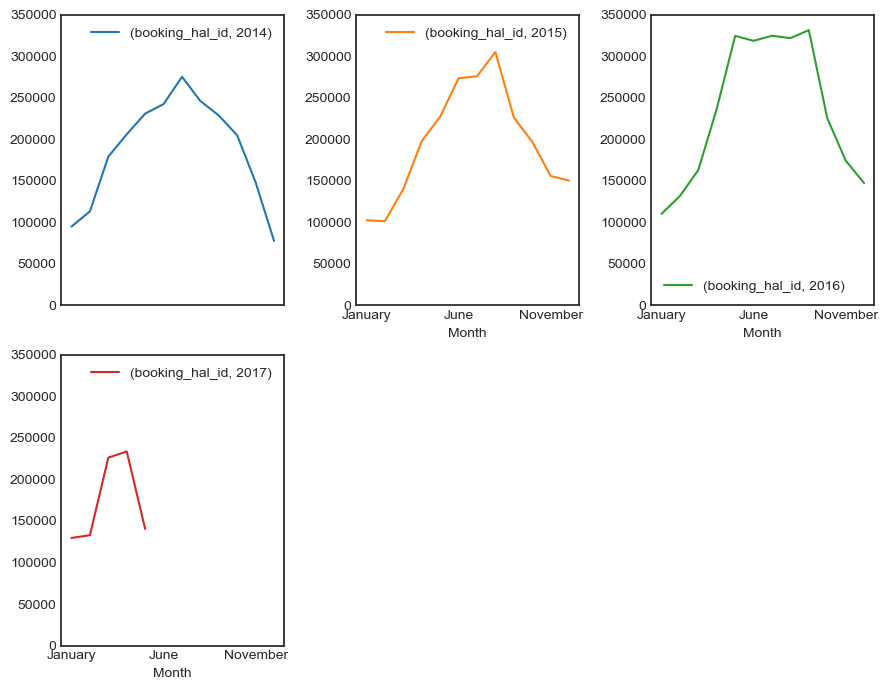

In [16]:
# Plot the average bookings per month per year as separate charts

monthly = pd.DataFrame(monthly)
fg = monthly.unstack(level=0).loc[month_order].plot(kind='line', subplots=True, rot=0, figsize=(9, 7), layout=(2, 3), ylim = (0, 350000))

plt.tight_layout()

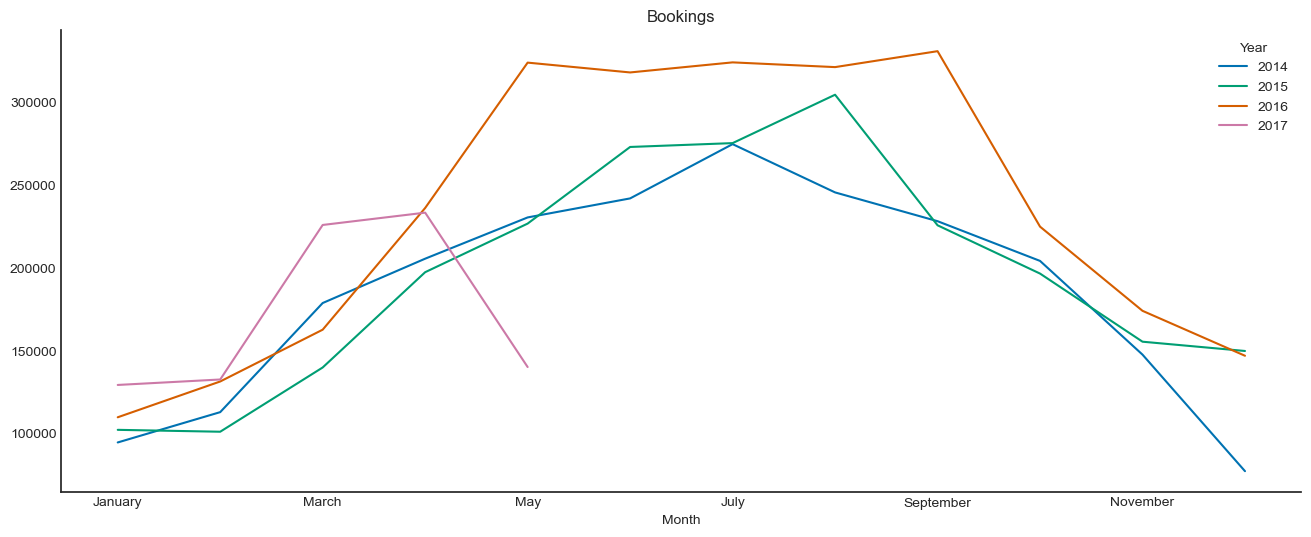

In [17]:
# Plot the average bookings per month per year on the same chart
plt.style.use('seaborn-colorblind')

fg = monthly.reset_index().pivot('Month','Year','booking_hal_id').loc[month_order].plot(title='Bookings', grid=False) 

# remove the top and right spines
fg.spines['top'].set_visible(False)
fg.spines['right'].set_visible(False)

# Exporting the figure
plt.savefig("bookings_by_month_year.png", bbox_inches='tight') 

plt.show()

### 2.2 Bookings by Weekday

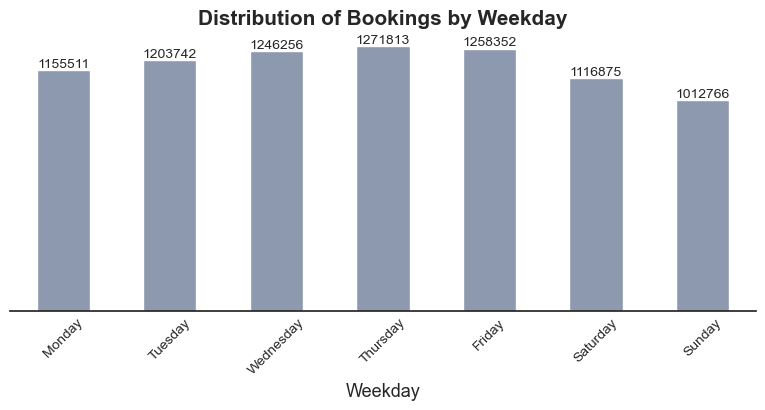

In [18]:
# Plot the weekday distribution

# Define the order of the days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar chart of weekday distribution for all bookings
fg = df_biketrips['Weekday'].value_counts().reindex(day_order).plot.bar(figsize = (8,4), color = ['#8D99AE'])
plt.tight_layout()
# remove the top and right spines
fg.spines[['top', 'right', 'left']].set_visible(False)

#Set titles and axes
plt.xlabel('Weekday', fontsize = 13)
plt.title('Distribution of Bookings by Weekday', fontsize = 15, fontweight = 'semibold')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks([])  # Remove y-axis tick labels

# Display the plot with ticks on the x and y axes
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=False, right=False)

# Add text annotations for each bar
for bar in fg.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plt.text(x, y, y, ha='center', va='bottom')

# Exporting the correlation heatmap
plt.savefig("bookings_by_day.png", bbox_inches='tight') 

plt.show()

In [19]:
# Calculate the average weekday distribution of bookings

avg_weekly = df_biketrips.groupby(['Year', 'Weekday'])['booking_hal_id'].count().groupby('Weekday').mean().round()
avg_weekly

Weekday
Friday       314588.0
Monday       288878.0
Saturday     279219.0
Sunday       253192.0
Thursday     317953.0
Tuesday      300936.0
Wednesday    311564.0
Name: booking_hal_id, dtype: float64

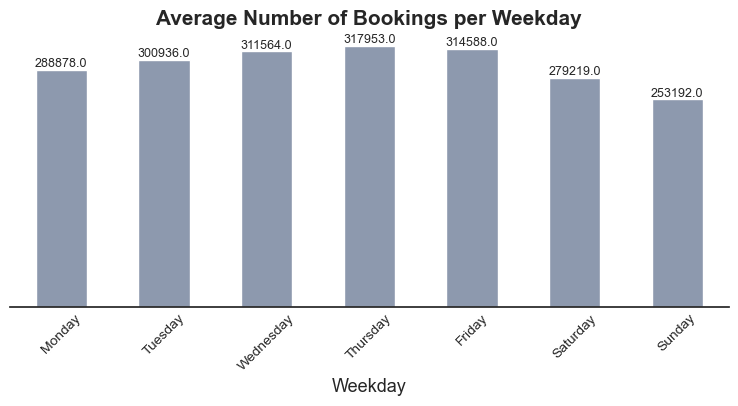

In [20]:
# Plot the average weekday distribution of bookings

# Define the order of the days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar chart of average weekday distribution for all bookings
fg = avg_weekly.reindex(day_order).plot.bar(figsize = (8,4), color = ['#8D99AE'])
plt.tight_layout()

# remove the top and right spines
fg.spines['top'].set_visible(False)
fg.spines['right'].set_visible(False)
fg.spines['left'].set_visible(False)

#Set titles and axes
plt.xlabel('Weekday', fontsize = 13)
plt.title('Average Number of Bookings per Weekday', fontsize = 15, fontweight = 'semibold')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks([])  # Remove y-axis tick labels

# Display the plot with ticks on the x and y axes
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=False, right=False)

# Add text annotations for each bar
for bar in fg.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plt.text(x, y, y, ha='center', va='bottom', fontsize = 9)

# Exporting the figure
plt.savefig("avg_bookings_by_weekday.png", bbox_inches='tight') 

plt.show()

<Figure size 1200x600 with 0 Axes>

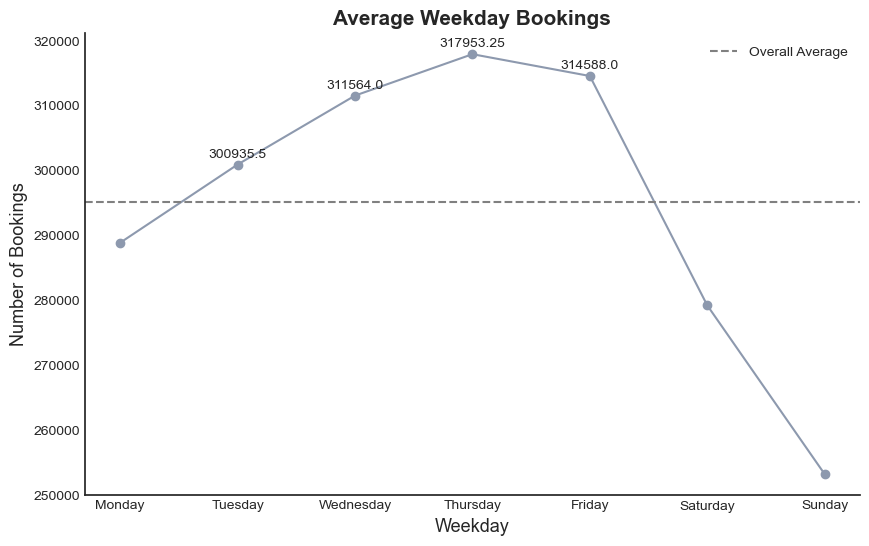

In [21]:
# Calculate the frequency of bookings for each weekday
weekday_means = df_biketrips.groupby(['Weekday', 'Year'])['booking_hal_id'].count().groupby(level=0).mean().loc[day_order]

# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set_style('white')

# Plot the distribution of bookings throughout the week
plt.figure(figsize=(10, 6))
plt.plot(weekday_means.index, weekday_means.values, marker='o', color = '#8D99AE')
plt.axhline(y=weekday_means.mean(), color='grey', linestyle='--', label='Overall Average')
plt.xlabel('Weekday', fontsize = 13)
plt.ylabel('Number of Bookings', fontsize = 13)
plt.title('Average Weekday Bookings', fontsize = 15, fontweight = 'semibold')
plt.legend()

# Identify peak days or periods of high demand 
peak_days = weekday_means[weekday_means > weekday_means.mean()]
for day, count in peak_days.items():
    plt.annotate(f'{count}', xy=(day, count), xytext=(0, 5), textcoords='offset points', ha='center')

# Remove the grid and spines (axis lines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(False)
    
# Exporting the correlation heatmap
plt.savefig("freq_bookings_by_weekday.png", bbox_inches='tight') 

# Display the plot
plt.show()

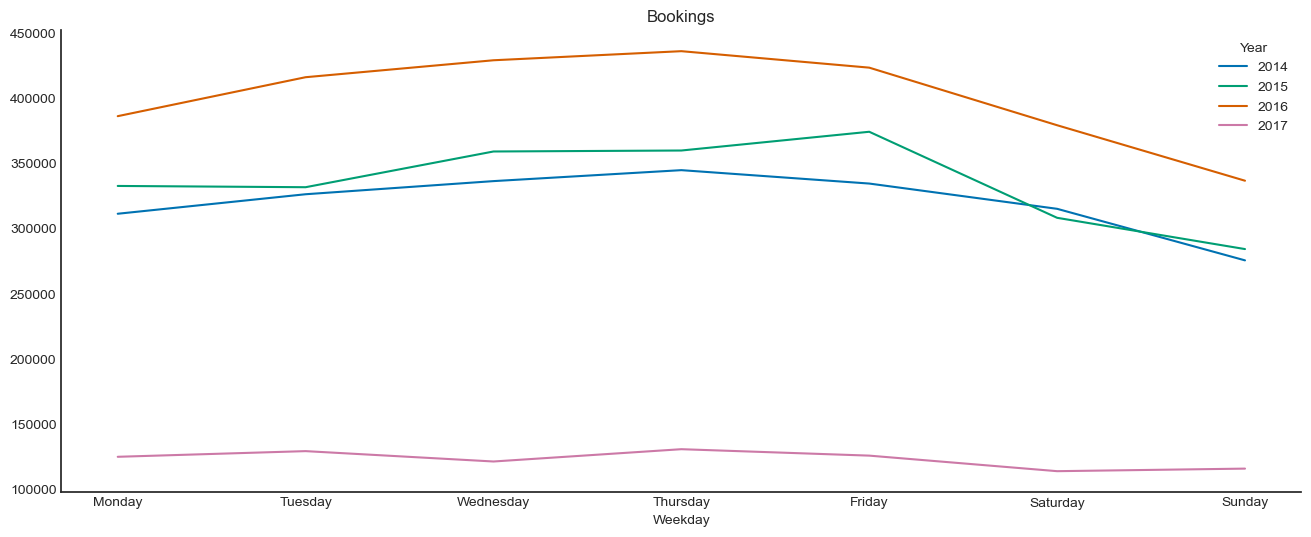

In [22]:
# Plot the average bookings per Weekday per year on the same chart
weekly = df_biketrips.groupby(['Year', 'Weekday'])['booking_hal_id'].count()
df = pd.DataFrame(weekly)

fg = df.reset_index().pivot('Weekday','Year','booking_hal_id').loc[day_order].plot(title='Bookings', grid=False) 

# remove the top and right spines
fg.spines['top'].set_visible(False)
fg.spines['right'].set_visible(False)

# Exporting the figure
plt.savefig("bookings_by_weekday_year.png", bbox_inches='tight') 

plt.show()

### 2.3 Bookings by Week

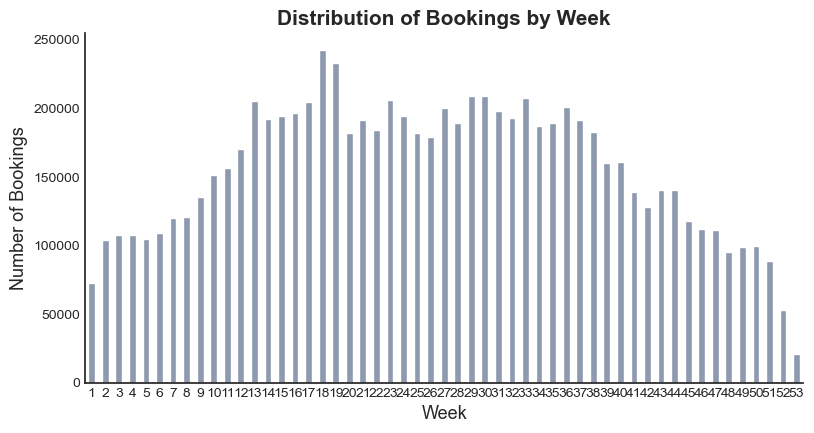

In [23]:
# Plot the weekly distribution

df_biketrips['Week'] = df_biketrips['datetime_from'].dt.isocalendar().week

# Create a bar chart of weekly distribution for all bookings
fg = df_biketrips['Week'].value_counts().sort_index().plot.bar(figsize = (8,4), color = ['#8D99AE'])
plt.tight_layout()
fg.spines['top'].set_visible(False)
fg.spines['right'].set_visible(False)

#Set titles and axes
plt.xlabel('Week', fontsize = 13)
plt.ylabel('Number of Bookings', fontsize = 13)
plt.title('Distribution of Bookings by Week', fontsize = 15, fontweight = 'semibold')
plt.yticks(fontsize = 10)
# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=0, fontsize = 10)

# Display the plot with ticks on the x and y axes
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

# Change the scientific axis notation
plt.ticklabel_format(axis='y', style='plain')

# Exporting the correlation heatmap
plt.savefig("bookings_by_week.png", bbox_inches='tight') 

plt.show()

The number of bookings is higher up to Week 20 due to the partial year in 2017.

<Figure size 1200x600 with 0 Axes>

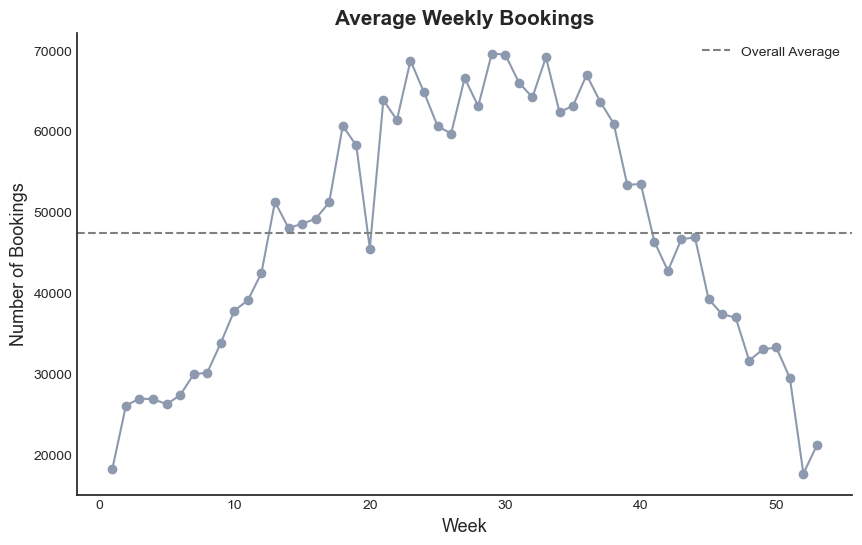

In [24]:
# Calculate the frequency of bookings for each week
weekly_means = df_biketrips.groupby(['Week', 'Year'])['booking_hal_id'].count().groupby(level=0).mean()

# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set_style('white')

# Plot the distribution of bookings throughout the year
plt.figure(figsize=(10, 6))
plt.plot(weekly_means.index, weekly_means.values, marker='o', color = '#8D99AE')
plt.axhline(y=weekly_means.mean(), color='grey', linestyle='--', label='Overall Average')
plt.xlabel('Week', fontsize = 13)
plt.ylabel('Number of Bookings', fontsize = 13)
plt.title('Average Weekly Bookings', fontsize = 15, fontweight = 'semibold')
plt.legend()

# Remove the grid and spines (axis lines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(False)
    
# Exporting the correlation heatmap
plt.savefig("freq_bookings_by_week.png", bbox_inches='tight') 

# Display the plot
plt.show()

Why is there a big drop in Week 20?

In [25]:
# Use groupby to group and count
week_year = df_biketrips.groupby(['Week', 'Year'])['booking_hal_id'].count()

# Convert the result to a dataframe
week_year = pd.DataFrame(week_year)

# Get a specific group
week_year.groupby('Week').get_group(20) 

booking_hal_id
Week Year                
20   2014           51533
     2015           49270
     2016           69032
     2017           12043

The drop in Week 20 is due to 2017 being a partial year and not including the full week. The average for 2014-2016 only is 56612.

### 2.4 Bookings by Hour

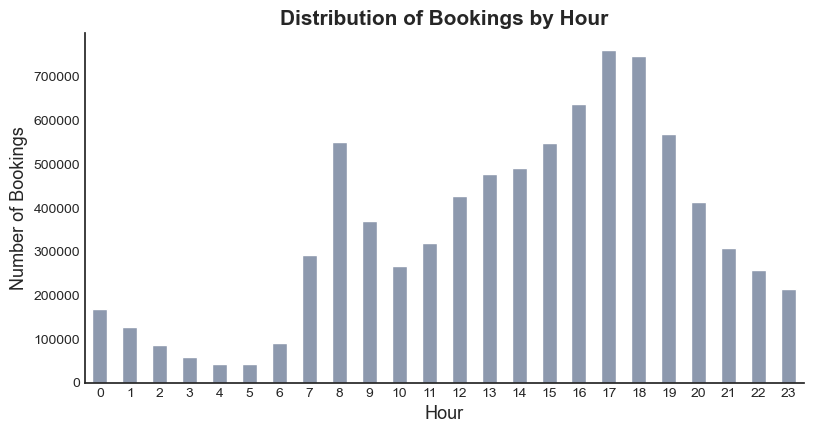

In [26]:
# Plot the daily distribution

# Create a bar chart of hourly distribution for all bookings
fg = df_biketrips['hour_from'].value_counts().sort_index().plot.bar(figsize = (8,4), color = ['#8D99AE'])
plt.tight_layout()
fg.spines['top'].set_visible(False)
fg.spines['right'].set_visible(False)

#Set titles and axes
plt.xlabel('Hour', fontsize = 13)
plt.ylabel('Number of Bookings', fontsize = 13)
plt.title('Distribution of Bookings by Hour', fontsize = 15, fontweight = 'semibold')
plt.yticks(fontsize = 10)
# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=0, fontsize = 10)

# Display the plot with ticks on the x and y axes
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

# Change the scientific axis notation
plt.ticklabel_format(axis='y', style='plain')

# Exporting the correlation heatmap
plt.savefig("bookings_by_hour.png", bbox_inches='tight') 

plt.show()

<Figure size 1200x600 with 0 Axes>

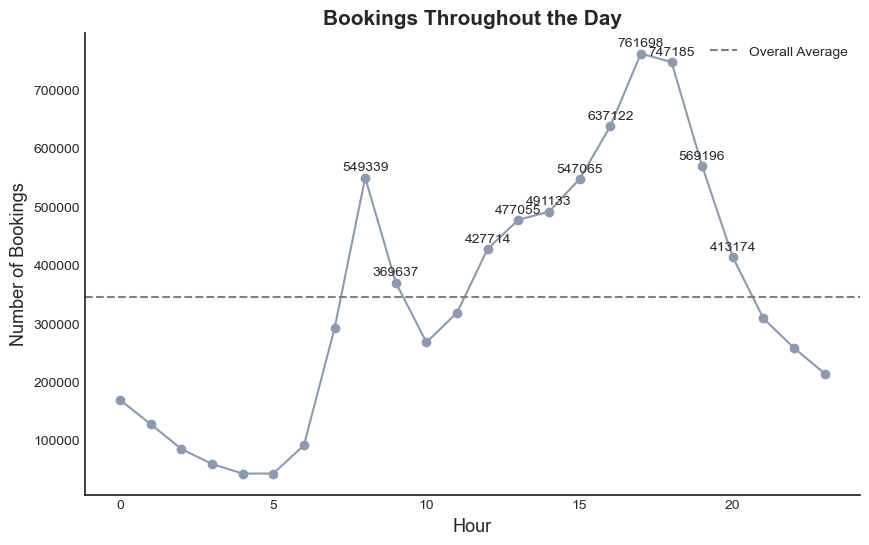

In [27]:
# Calculate the frequency of bookings for each hour
hourly_distribution = df_biketrips['hour_from'].value_counts().sort_index()

# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set_style('white')

# Plot the distribution of bookings throughout the day
plt.figure(figsize=(10, 6))
plt.plot(hourly_distribution.index, hourly_distribution.values, marker='o', color = '#8D99AE')
plt.axhline(y=hourly_distribution.mean(), color='grey', linestyle='--', label='Overall Average')
plt.xlabel('Hour', fontsize = 13)
plt.ylabel('Number of Bookings', fontsize = 13)
plt.title('Bookings Throughout the Day', fontsize = 15, fontweight = 'semibold')
plt.legend()

# Remove the grid and spines (axis lines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(False)

# Identify peak hours or periods of high demand 
peak_hours = hourly_distribution[hourly_distribution > hourly_distribution.mean()]
for hour, count in peak_hours.items():
    plt.annotate(f'{count}', xy=(hour, count), xytext=(0, 5), textcoords='offset points', ha='center', fontsize = 10)
    
# Exporting the correlation heatmap
plt.savefig("hourly_bookings.png", bbox_inches='tight') 

# Display the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

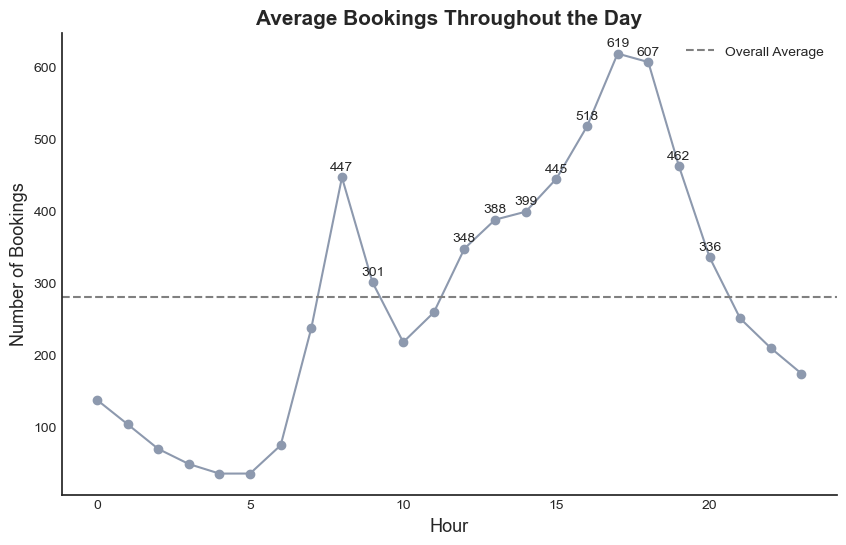

In [28]:
# Calculate the frequency of bookings for each hour

# Calculate the mean number of bike trips per hour
hourly_means = df_biketrips.groupby(['hour_from', df_biketrips['date_from']])['booking_hal_id'].count().groupby(level=0).mean()

# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set_style('white')

# Plot the distribution of average bookings throughout the day
plt.figure(figsize=(10, 6))
plt.plot(hourly_means.index, hourly_means.values, marker='o', color = '#8D99AE')
plt.axhline(y=hourly_means.mean(), color='grey', linestyle='--', label='Overall Average')
plt.xlabel('Hour', fontsize = 13)
plt.ylabel('Number of Bookings', fontsize = 13)
plt.title('Average Bookings Throughout the Day', fontsize = 15, fontweight = 'semibold')
plt.legend()

# Remove the grid and spines (axis lines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(False)

# Identify peak hours or periods of high demand (optional)
peak_hours = hourly_means[hourly_means > hourly_means.mean()]
for hour, count in peak_hours.items():
    plt.annotate(f'{round(count)}', xy=(hour, count), xytext=(0, 5), textcoords='offset points', ha='center')
    
# Exporting the correlation heatmap
plt.savefig("avg_hourly_bookings.png", bbox_inches='tight') 

# Display the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

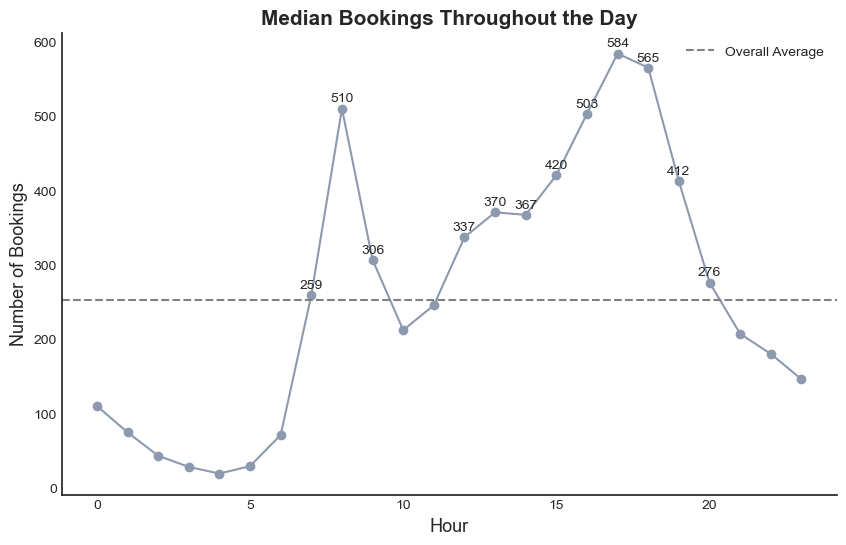

In [29]:
# Calculate the frequency of bookings for each hour

# Calculate the median number of bike trips per hour
hourly_median = df_biketrips.groupby(['hour_from', df_biketrips['date_from']])['booking_hal_id'].count().groupby(level=0).median()

# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set_style('white')

# Plot the distribution of median bookings throughout the day
plt.figure(figsize=(10, 6))
plt.plot(hourly_median.index, hourly_median.values, marker='o', color = '#8D99AE')
plt.axhline(y=hourly_median.median(), color='grey', linestyle='--', label='Overall Average')
plt.xlabel('Hour', fontsize = 13)
plt.ylabel('Number of Bookings', fontsize = 13)
plt.title('Median Bookings Throughout the Day', fontsize = 15, fontweight = 'semibold')
plt.legend()

# Remove the grid and spines (axis lines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(False)

# Identify peak hours or periods of high demand (optional)
peak_hours = hourly_median[hourly_median > hourly_median.median()]
for hour, count in peak_hours.items():
    plt.annotate(f'{round(count)}', xy=(hour, count), xytext=(0, 5), textcoords='offset points', ha='center')
    
# Exporting the correlation heatmap
plt.savefig("med_hourly_bookings.png", bbox_inches='tight') 

# Display the plot
plt.show()

In [30]:
# Find the hourly minimum

hourly_min = df_biketrips.groupby(['hour_from', df_biketrips['date_from']])['booking_hal_id'].count().groupby(level=0).min()
hourly_min

hour_from
0      8
1      4
2      3
3      2
4      1
5      3
6      4
7      5
8      5
9      4
10    11
11     1
12    27
13    34
14    35
15    30
16    18
17    18
18    11
19    24
20    10
21    23
22    12
23    17
Name: booking_hal_id, dtype: int64

In [31]:
# Find the hourly maximum

hourly_max = df_biketrips.groupby(['hour_from', df_biketrips['date_from']])['booking_hal_id'].count().groupby(level=0).max()
hourly_max

hour_from
0      776
1      482
2      398
3      231
4      227
5      154
6      190
7      653
8     1110
9      616
10     536
11     759
12    1024
13    1185
14    1203
15    1136
16    1321
17    1489
18    1471
19    1159
20    1104
21     880
22     745
23    1069
Name: booking_hal_id, dtype: int64

Why were there 776 trips at midnight? What happened that day?

In [32]:
# Create a new dataframe with the hour_from, datetime_from and booking_hal_id count
hourly_count = df_biketrips.groupby(['hour_from', df_biketrips['date_from']])['booking_hal_id'].count().reset_index()

# Find the days and times where 776 bookings where made
hourly_count[hourly_count['booking_hal_id'] == 776]

,hour_from,date_from,booking_hal_id
194,0,2014-07-14,776
11038,8,2017-04-21,776
17356,14,2014-05-25,776
19415,15,2016-08-31,776
20509,16,2016-04-16,776
21000,17,2014-04-07,776
21063,17,2014-06-09,776
21510,17,2015-08-30,776
21729,17,2016-04-05,776
21746,17,2016-04-22,776


**The 13 July 2014 was the Fifa World Cup final where Germany won against Argentina kickoff 21:00 (CET).**

In [33]:
# View the trips throughout July 14
hourly_count[hourly_count['date_from'] == '2014-07-14']

,hour_from,date_from,booking_hal_id
194,0,2014-07-14,776
1422,1,2014-07-14,482
2651,2,2014-07-14,283
3878,3,2014-07-14,178
5108,4,2014-07-14,75
6337,5,2014-07-14,25
7567,6,2014-07-14,41
8797,7,2014-07-14,110
10027,8,2014-07-14,310
11257,9,2014-07-14,338


In [34]:
# Compare with July 13 the day of the match
hourly_count[hourly_count['date_from'] == '2014-07-13']

,hour_from,date_from,booking_hal_id
193,0,2014-07-13,389
1421,1,2014-07-13,292
2650,2,2014-07-13,233
3877,3,2014-07-13,128
5107,4,2014-07-13,66
6336,5,2014-07-13,51
7566,6,2014-07-13,79
8796,7,2014-07-13,67
10026,8,2014-07-13,78
11256,9,2014-07-13,72


The number of trips between 21 and 22 during the match is lower than the previous day

In [35]:
# Find the days and times where 1069 bookings where made
hourly_count[hourly_count['booking_hal_id'] == 1069]

,hour_from,date_from,booking_hal_id
21519,17,2015-09-08,1069
29208,23,2016-07-07,1069


**The 7 July 2016 was the Euro Championship Game where Germany lost against France 21:00 (CET)**

In [36]:
# View the trips throughout 07 July 2016
hourly_count[hourly_count['date_from'] == '2016-07-07']

,hour_from,date_from,booking_hal_id
916,0,2016-07-07,149
2145,1,2016-07-07,103
3372,2,2016-07-07,45
4602,3,2016-07-07,31
5831,4,2016-07-07,34
7061,5,2016-07-07,30
8291,6,2016-07-07,147
9521,7,2016-07-07,574
10751,8,2016-07-07,920
11981,9,2016-07-07,524


In [37]:
# Compare with the next day July 8 2016
hourly_count[hourly_count['date_from'] == '2016-07-8']

,hour_from,date_from,booking_hal_id
917,0,2016-07-08,328
2146,1,2016-07-08,188
3373,2,2016-07-08,132
4603,3,2016-07-08,94
5832,4,2016-07-08,47
7062,5,2016-07-08,40
8292,6,2016-07-08,134
9522,7,2016-07-08,517
10752,8,2016-07-08,810
11982,9,2016-07-08,468


In [38]:
# Find the days and times where 1203 bookings where made
hourly_count[hourly_count['booking_hal_id'] == 1203]

,hour_from,date_from,booking_hal_id
18406,14,2017-04-09,1203


In [39]:
# Compare with the next day July 8
hourly_count[hourly_count['date_from'] == '2017-04-09']

,hour_from,date_from,booking_hal_id
1191,0,2017-04-09,327
2421,1,2017-04-09,299
3647,2,2017-04-09,179
4878,3,2017-04-09,163
6107,4,2017-04-09,139
7336,5,2017-04-09,105
8566,6,2017-04-09,66
9796,7,2017-04-09,72
11026,8,2017-04-09,176
12256,9,2017-04-09,279


**The 9 April 2017 was the Women's International Friendlies football match where Germany won (2-1) against Canada kickoff 15:00 (CET)**

**The number of Call-A-Bike bookings in Hamburg increases when the German national football teams (men and women) are playing**
* Which stations are most in demand on those days?

### 2.5 Football Season Heatmaps

In [40]:
data = df_biketrips[df_biketrips['Month'].isin(['April', 'June', 'July'])]
data = pd.DataFrame(data.groupby(['datetime_from'])['booking_hal_id'].count().reset_index())

data

,datetime_from,booking_hal_id
0,2014-04-01 00:00:36,1
1,2014-04-01 00:01:37,1
2,2014-04-01 00:01:58,1
3,2014-04-01 00:02:39,1
4,2014-04-01 00:02:44,1
...,...,...
2385968,2017-04-30 23:59:03,1
2385969,2017-04-30 23:59:17,1
2385970,2017-04-30 23:59:21,1
2385971,2017-04-30 23:59:37,1


In [41]:
# Find the maximum value when grouped by hour

data_heatmap = data.groupby([data.datetime_from.dt.isocalendar().week,
                 data.datetime_from.dt.strftime('%Y-%m-%d'), 
                 data.datetime_from.dt.strftime('%H:00')])['booking_hal_id'].count().rename_axis(index=['week','day','hour'])
data_heatmap.reset_index()

,week,day,hour,booking_hal_id
0,13,2016-04-01,00:00,134
1,13,2016-04-01,01:00,101
2,13,2016-04-01,02:00,76
3,13,2016-04-01,03:00,53
4,13,2016-04-01,04:00,32
...,...,...,...,...
7261,31,2015-07-31,19:00,718
7262,31,2015-07-31,20:00,536
7263,31,2015-07-31,21:00,424
7264,31,2015-07-31,22:00,373


In [42]:
data_heatmap.min()

1

In [43]:
# Find the dates and times when the count was below 5

data_heatmap[data_heatmap < 5]

week  day         hour 
14    2015-04-02  04:00    3
16    2015-04-15  04:00    3
      2015-04-16  04:00    3
      2016-04-18  01:00    4
18    2015-04-28  04:00    4
      2015-04-29  04:00    3
27    2014-07-01  11:00    1
Name: booking_hal_id, dtype: int64

What happened at 11:00 on the 2014-07-01?

In [44]:
data_heatmap.max()

1213

In [45]:
# Find the dates and times when the count was above 1100

data_heatmap[data_heatmap > 1100]

week  day         hour 
14    2017-04-09  16:00    1111
22    2016-06-01  17:00    1104
                  18:00    1115
23    2016-06-06  17:00    1131
                  18:00    1156
25    2016-06-21  17:00    1213
27    2015-06-30  18:00    1140
30    2016-07-26  18:00    1108
Name: booking_hal_id, dtype: int64

#### 2.5.1 Heatmaps April 2014 to 2017

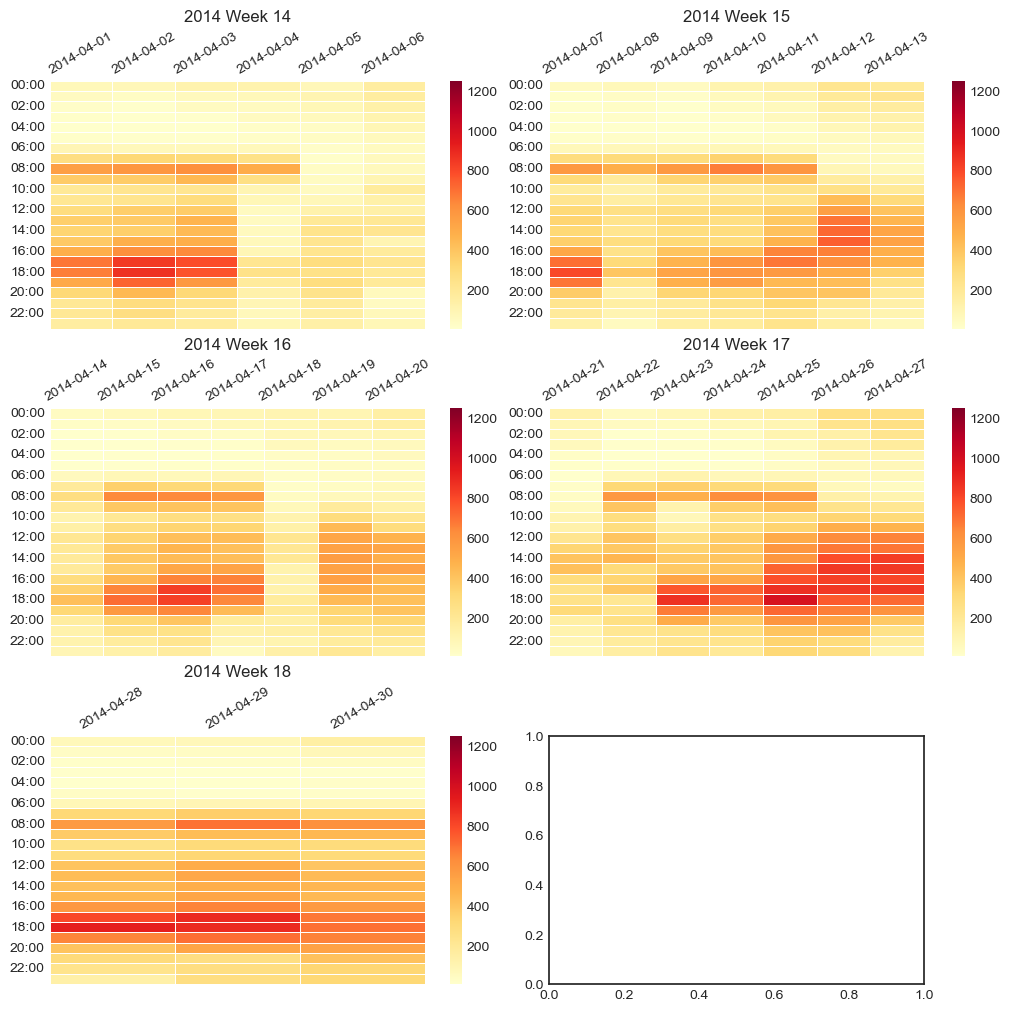

In [46]:
# select the month and year to plot 
plot_Apr14 = data[(data['datetime_from'] >= '2014-04-01') & (data['datetime_from'] < '2014-05-01')]

# reformat the data to give the booking count for the week, day and hour
s = plot_Apr14.groupby([plot_Apr14.datetime_from.dt.isocalendar().week,
                 plot_Apr14.datetime_from.dt.strftime('%Y-%m-%d'), 
                 plot_Apr14.datetime_from.dt.strftime('%H:00')])['booking_hal_id'].count().rename_axis(index=['week','day','hour'])
    
# plot the weekly data by day and hour in heatmap subplots

# create subplots
fig, axes = plt.subplots(3,2, figsize = (10,10), constrained_layout = True)
#plt.subplots_adjust(left = None, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.3)

# plot the data
for w, ax in zip(s.index.unique('week'), axes.ravel()):
    sns.heatmap(s.loc[w].unstack(level = 'day'), ax = ax, cmap = 'YlOrRd', linewidth = 0.5, vmax = 1250)
    
    # remove the x and y labels and put the x-tick labels(days) on the top rotated by 30 degrees
    ax.xaxis.tick_top()
    ax.set(xlabel = '', ylabel = '')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)

    ax.set_title(f'2014 Week {w}')
    
# Exporting the correlation heatmap
plt.savefig("Heatmap_April14.png", bbox_inches='tight') 

# Display the plot
plt.show()

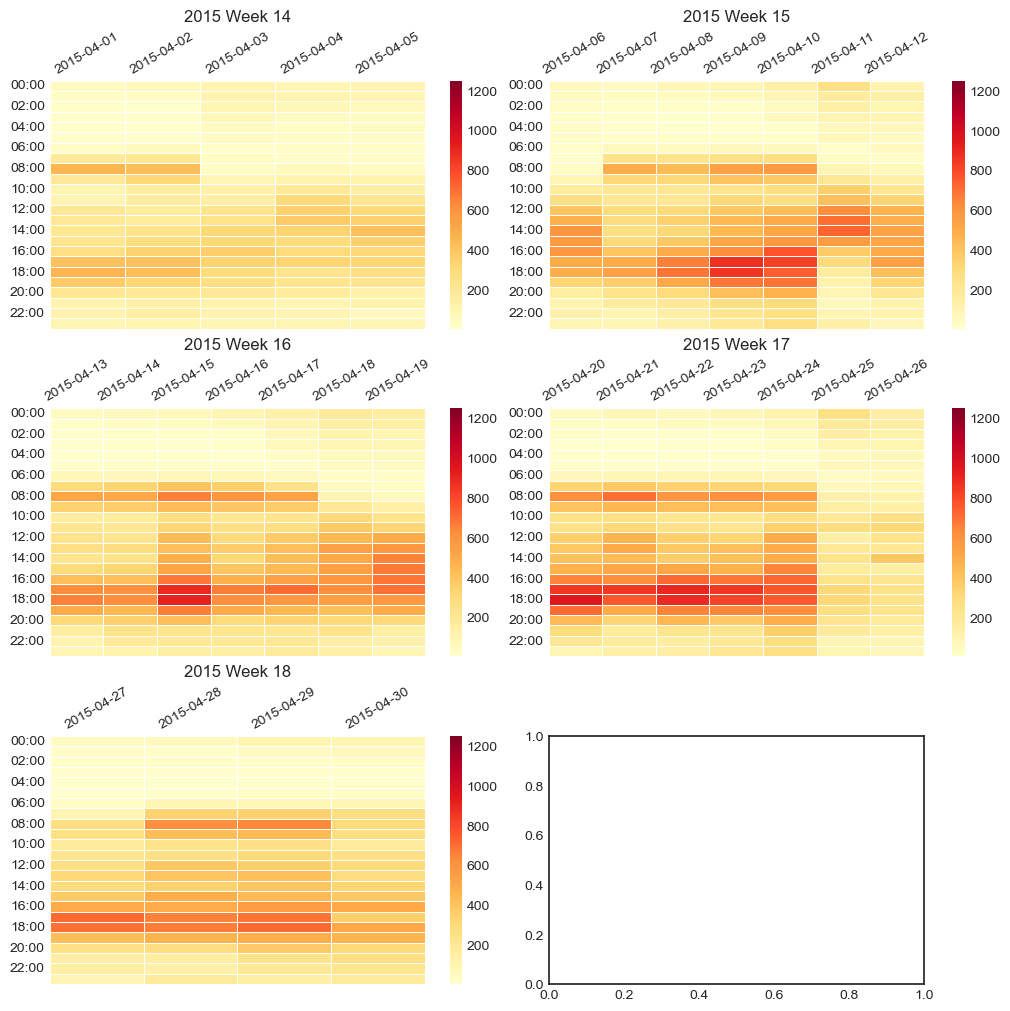

In [47]:
# select the month and year to plot 
plot_Apr15 = data[(data['datetime_from'] >= '2015-04-01') & (data['datetime_from'] <= '2015-05-01')]

# reformat the data to give the booking count for the week, day and hour
s = plot_Apr15.groupby([plot_Apr15.datetime_from.dt.isocalendar().week,
                 plot_Apr15.datetime_from.dt.strftime('%Y-%m-%d'), 
                 plot_Apr15.datetime_from.dt.strftime('%H:00')])['booking_hal_id'].count().rename_axis(index=['week','day','hour'])
    
# plot the weekly data by day and hour in heatmap subplots

# create subplots
fig, axes = plt.subplots(3,2, figsize = (10,10), constrained_layout = True)
#plt.subplots_adjust(left = None, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.3)

# plot the data
for w, ax in zip(s.index.unique('week'), axes.ravel()):
    sns.heatmap(s.loc[w].unstack(level = 'day'), ax = ax, cmap = 'YlOrRd', linewidth = 0.5, vmax = 1250)
    
    # remove the x and y labels and put the x-tick labels(days) on the top rotated by 30 degrees
    ax.xaxis.tick_top()
    ax.set(xlabel = '', ylabel = '')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)

    ax.set_title(f'2015 Week {w}')
    
# Exporting the correlation heatmap
plt.savefig("Heatmap_April15.png", bbox_inches='tight') 

# Display the plot
plt.show()

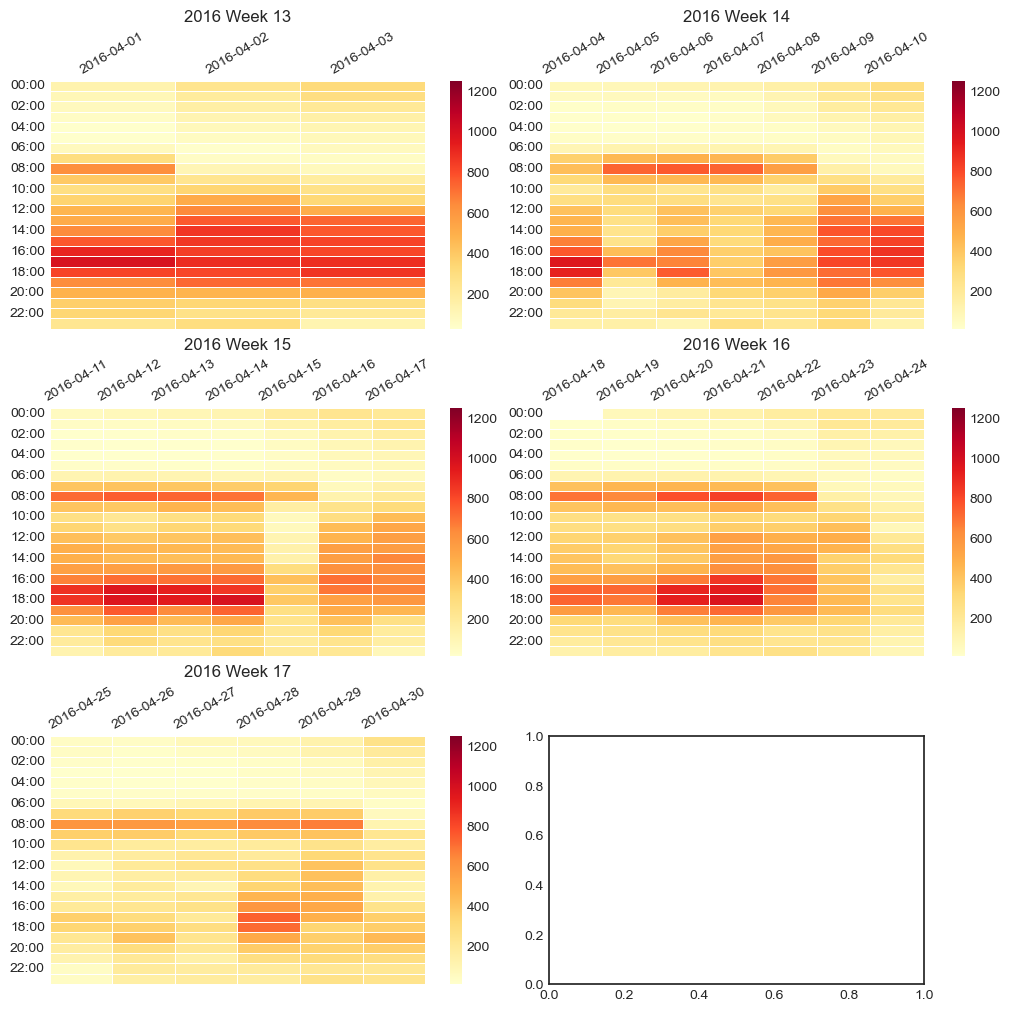

In [48]:
# select the month and year to plot 
plot_Apr16 = data[(data['datetime_from'] >= '2016-04-01') & (data['datetime_from'] < '2016-05-01')]

# reformat the data to give the booking count for the week, day and hour
s = plot_Apr16.groupby([plot_Apr16.datetime_from.dt.isocalendar().week,
                 plot_Apr16.datetime_from.dt.strftime('%Y-%m-%d'), 
                 plot_Apr16.datetime_from.dt.strftime('%H:00')])['booking_hal_id'].count().rename_axis(index=['week','day','hour'])
    
# plot the weekly data by day and hour in heatmap subplots

# create subplots
fig, axes = plt.subplots(3,2, figsize = (10,10), constrained_layout = True)
#plt.subplots_adjust(left = None, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.3)

# plot the data
for w, ax in zip(s.index.unique('week'), axes.ravel()):
    sns.heatmap(s.loc[w].unstack(level = 'day'), ax = ax, cmap = 'YlOrRd', linewidth = 0.5, vmax = 1250)
    
    # remove the x and y labels and put the x-tick labels(days) on the top rotated by 30 degrees
    ax.xaxis.tick_top()
    ax.set(xlabel = '', ylabel = '')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)

    ax.set_title(f'2016 Week {w}')
    
# Exporting the correlation heatmap
plt.savefig("Heatmap_April16.png", bbox_inches='tight') 

# Display the plot
plt.show()

#### 2.5.2 July 2014 to 2017

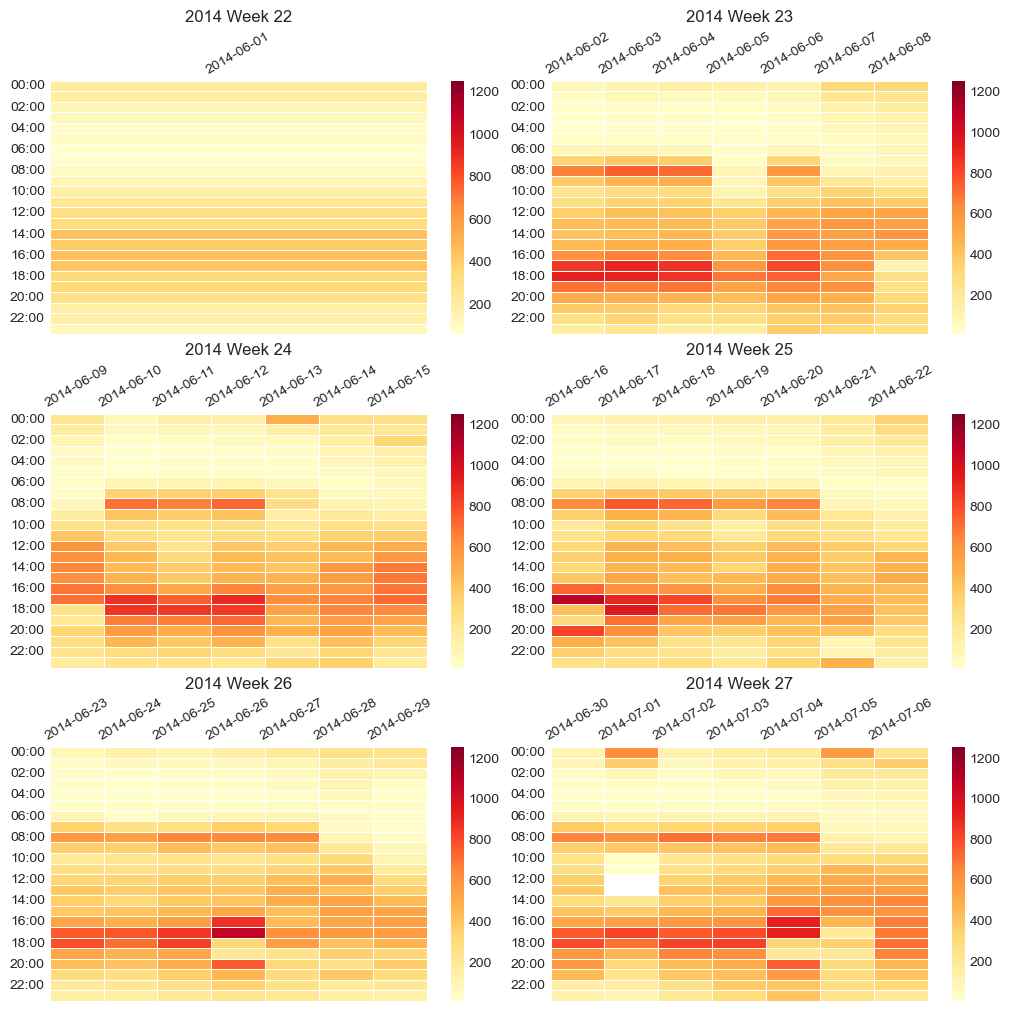

In [49]:
# select the month and year to plot 
plot_FIFA14 = data[(data['datetime_from'] >= '2014-06-01') & (data['datetime_from'] < '2014-08-01')]

# reformat the data to give the booking count for the week, day and hour
s = plot_FIFA14.groupby([plot_FIFA14.datetime_from.dt.isocalendar().week,
                 plot_FIFA14.datetime_from.dt.strftime('%Y-%m-%d'), 
                 plot_FIFA14.datetime_from.dt.strftime('%H:00')])['booking_hal_id'].count().rename_axis(index=['week','day','hour'])
    
# plot the weekly data by day and hour in heatmap subplots

# create subplots
fig, axes = plt.subplots(3,2, figsize = (10,10), constrained_layout = True)
#plt.subplots_adjust(left = None, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.3)

# plot the data
for w, ax in zip(s.index.unique('week'), axes.ravel()):
    sns.heatmap(s.loc[w].unstack(level = 'day'), ax = ax, cmap = 'YlOrRd', linewidth = 0.5, vmax = 1250)
    
    # remove the x and y labels and put the x-tick labels(days) on the top rotated by 30 degrees
    ax.xaxis.tick_top()
    ax.set(xlabel = '', ylabel = '')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)

    ax.set_title(f'2014 Week {w}')
    
# Exporting the correlation heatmap
plt.savefig("Heatmap_FIFA14.png", bbox_inches='tight') 

# Display the plot
plt.show()

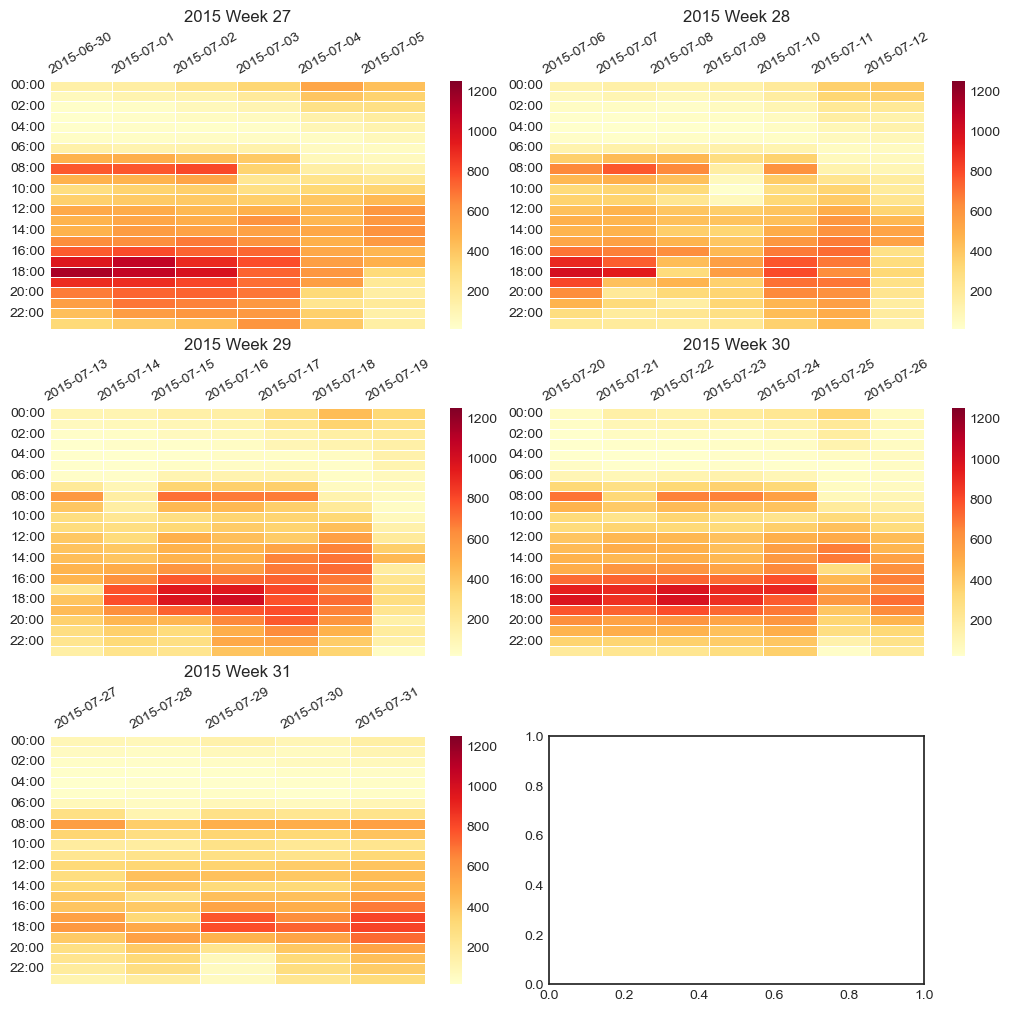

In [50]:
# select the month and year to plot 
plot_Jul15 = data[(data['datetime_from'] >= '2015-06-30') & (data['datetime_from'] < '2015-08-01')]

# reformat the data to give the booking count for the week, day and hour
s = plot_Jul15.groupby([plot_Jul15.datetime_from.dt.isocalendar().week,
                 plot_Jul15.datetime_from.dt.strftime('%Y-%m-%d'), 
                 plot_Jul15.datetime_from.dt.strftime('%H:00')])['booking_hal_id'].count().rename_axis(index=['week','day','hour'])
    
# plot the weekly data by day and hour in heatmap subplots

# create subplots
fig, axes = plt.subplots(3,2, figsize = (10,10), constrained_layout = True)
#plt.subplots_adjust(left = None, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.3)

# plot the data
for w, ax in zip(s.index.unique('week'), axes.ravel()):
    sns.heatmap(s.loc[w].unstack(level = 'day'), ax = ax, cmap = 'YlOrRd', linewidth = 0.5, vmax = 1250)
    
    # remove the x and y labels and put the x-tick labels(days) on the top rotated by 30 degrees
    ax.xaxis.tick_top()
    ax.set(xlabel = '', ylabel = '')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)

    ax.set_title(f'2015 Week {w}')
    
# Exporting the correlation heatmap
plt.savefig("Heatmap_July15.png", bbox_inches='tight') 

# Display the plot
plt.show()

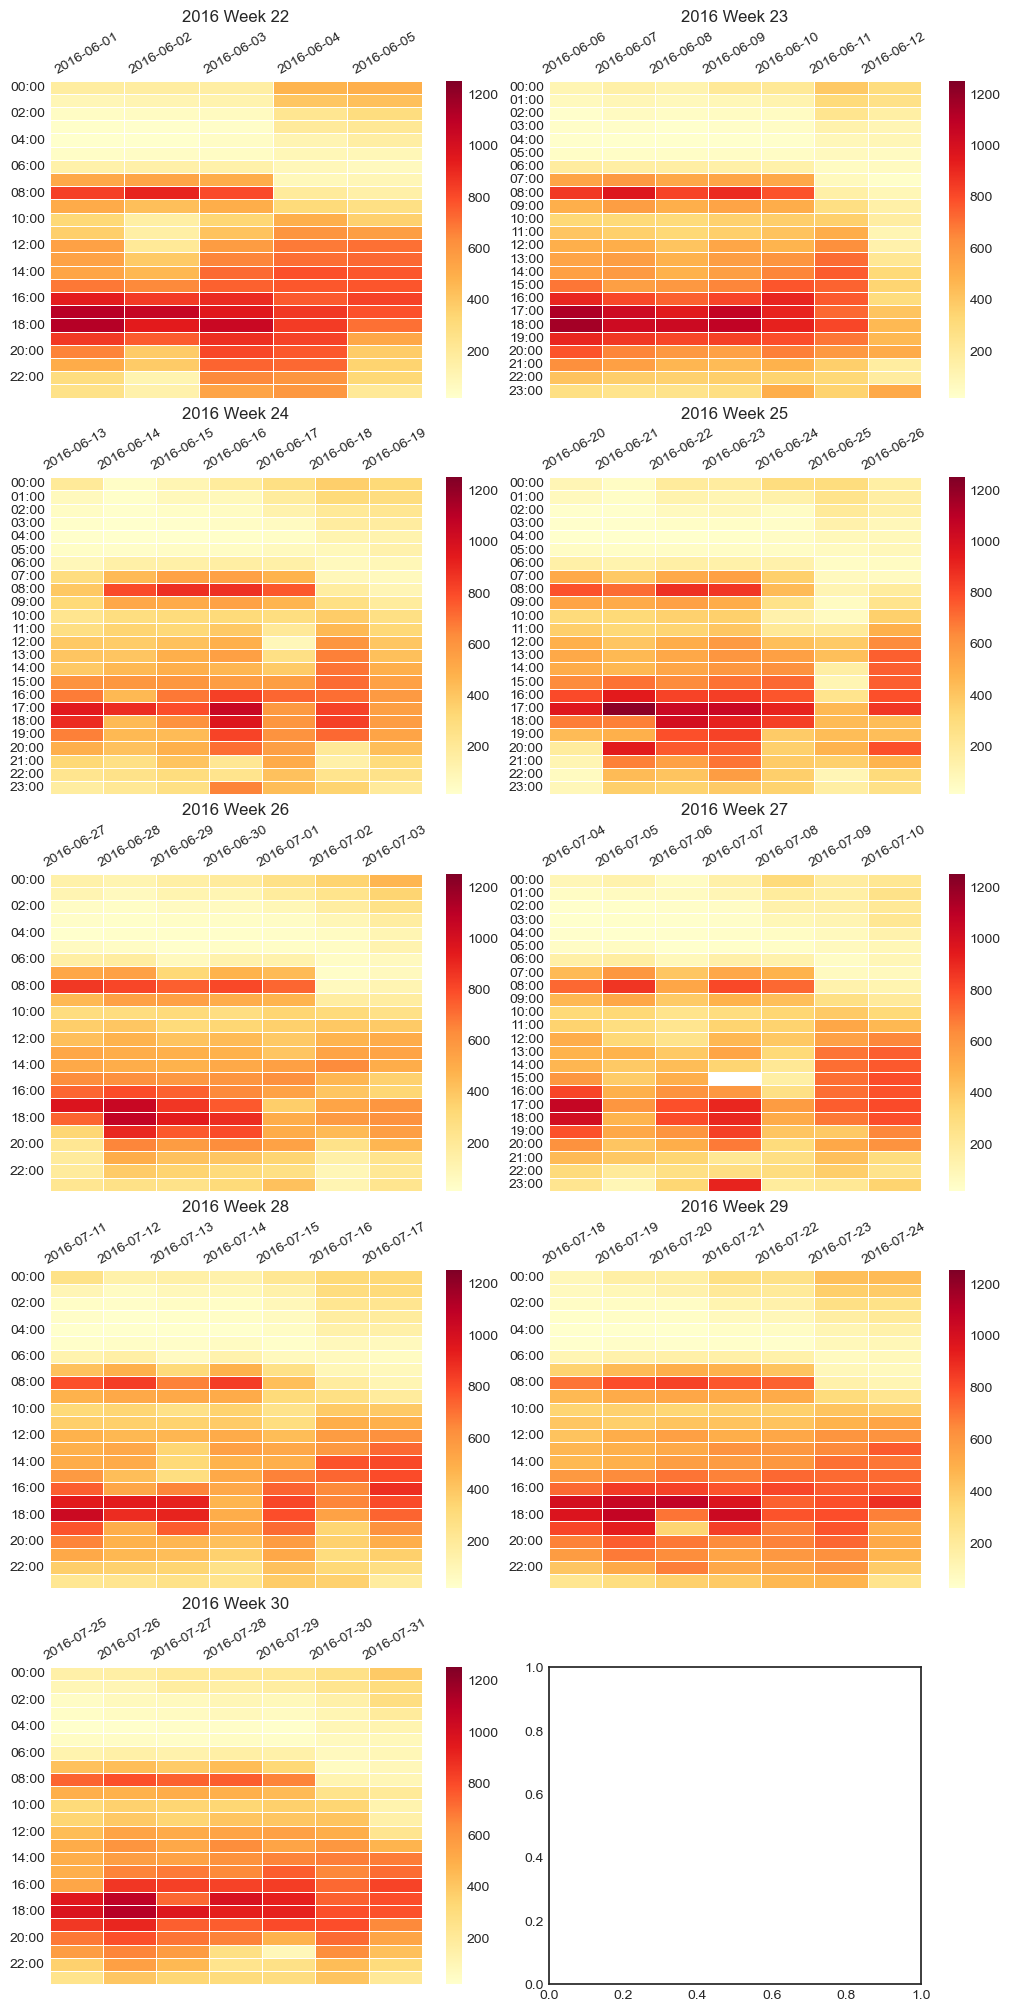

In [51]:
# select the month and year to plot 
plot_UEFA16 = data[(data['datetime_from'] >= '2016-06-01') & (data['datetime_from'] < '2016-08-01')]

# reformat the data to give the booking count for the week, day and hour
s = plot_UEFA16.groupby([plot_UEFA16.datetime_from.dt.isocalendar().week,
                 plot_UEFA16.datetime_from.dt.strftime('%Y-%m-%d'), 
                 plot_UEFA16.datetime_from.dt.strftime('%H:00')])['booking_hal_id'].count().rename_axis(index=['week','day','hour'])
    
# plot the weekly data by day and hour in heatmap subplots

# create subplots
fig, axes = plt.subplots(5,2, figsize = (10,20), constrained_layout = True)
#plt.subplots_adjust(left = None, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.3)

# plot the data
for w, ax in zip(s.index.unique('week'), axes.ravel()):
    sns.heatmap(s.loc[w].unstack(level = 'day'), ax = ax, cmap = 'YlOrRd', linewidth = 0.5, vmax = 1250)
    
    # remove the x and y labels and put the x-tick labels(days) on the top rotated by 30 degrees
    ax.xaxis.tick_top()
    ax.set(xlabel = '', ylabel = '')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)

    ax.set_title(f'2016 Week {w}')
    
# Exporting the correlation heatmap
plt.savefig("Heatmap_UEFA16.png", bbox_inches='tight') 

# Display the plot
plt.show()

### 2.6 Daily Bookings over Time

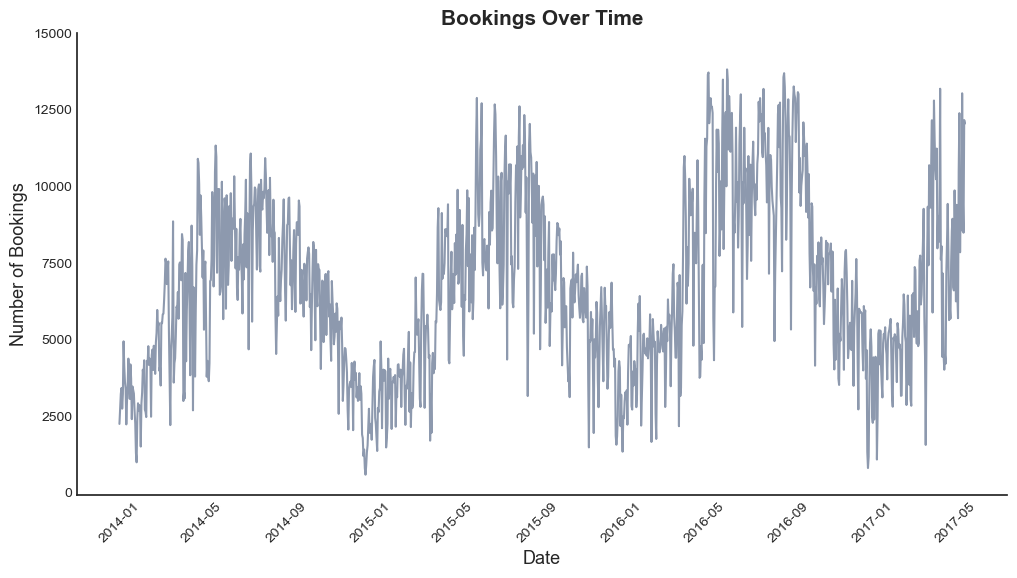

In [52]:
# Group the data by date and calculate the number of bookings for each date
daily = pd.DataFrame(df_biketrips.groupby('date_from')['booking_hal_id'].count().reset_index())

# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set_style('white')

# Plot the number of bookings over time
sns.lineplot(data = daily, x = 'date_from', y = 'booking_hal_id', color = '#8D99AE')

# Set labels and title
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Number of Bookings', fontsize = 13)
plt.title('Bookings Over Time', fontsize = 15, fontweight = 'semibold')
plt.yticks([0, 2500, 5000, 7500, 10000, 12500, 15000],fontsize = 10)

# Display the plot with ticks on the x and y axes
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

# Remove spines (axis lines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Exporting the correlation heatmap
plt.savefig("bookings_over_time.png", bbox_inches='tight') 

# Display the plot
plt.show()

**Use Time-Series Analysis to check the data is seasonal and stationary over time.**

## 3. Customer Analysis

### 3.1 New Customers per Month

In [53]:
# Sort the DataFrame by datetime_from column
df_biketrips.sort_values(by='datetime_from', inplace=True)

# Group by customer_hal_id and get the first datetime_from for each customer
first_booking_per_customer =  df_biketrips.groupby('customer_hal_id')['datetime_from'].first()

# Group the first bookings by month and count the number of new customers each month
new_customer_bookings = first_booking_per_customer.dt.to_period('M').value_counts()


In [54]:
# set the index as date and view 
new_customer_bookings.index = new_customer_bookings.index.to_timestamp()
new_customer_bookings

2014-01-01    20658
2014-03-01    16317
2014-04-01    13982
2014-05-01    12668
2014-02-01    12050
2014-07-01    11751
2014-06-01    10799
2016-05-01    10595
2015-08-01    10546
2014-08-01     9774
2016-07-01     9032
2016-08-01     8860
2015-06-01     8134
2015-07-01     8085
2016-06-01     7802
2016-09-01     7712
2014-09-01     7471
2015-05-01     7204
2015-04-01     6100
2016-04-01     6019
2014-10-01     5664
2015-09-01     5331
2017-04-01     5099
2015-10-01     4240
2017-03-01     4073
2016-10-01     4037
2015-03-01     3128
2016-03-01     3112
2017-05-01     3110
2014-11-01     2742
2015-11-01     2174
2015-12-01     1939
2016-02-01     1771
2015-02-01     1756
2016-11-01     1541
2016-12-01     1384
2017-02-01     1274
2015-01-01     1251
2014-12-01     1208
2016-01-01     1190
2017-01-01      944
Name: datetime_from, dtype: int64

In [55]:
# check the sum of the months adds up to the total number 262527

new_customer_bookings.sum()

262527

<Figure size 1200x600 with 0 Axes>

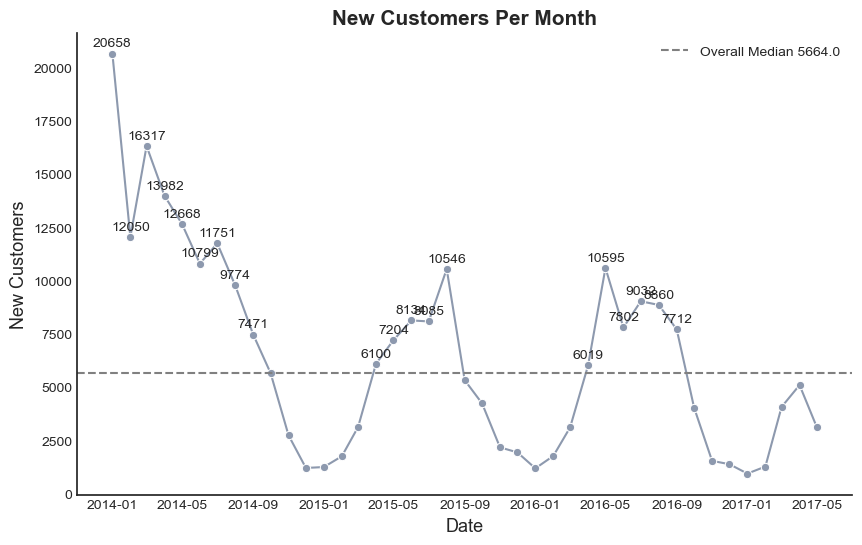

In [56]:
# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set_style('white')
ncb_median = new_customer_bookings.median()

# Plot the distribution of bookings throughout the day
plt.figure(figsize=(10, 6))
#plt.plot(new_customers_per_month.index, new_customers_per_month.values, marker = 'o', color = '#8D99AE')
sns.lineplot(data = new_customer_bookings, marker = 'o', color = '#8D99AE')
plt.axhline(y = new_customer_bookings.median(), color = 'grey', linestyle = '--', label = f'Overall Median {ncb_median}')
plt.xlabel('Date', fontsize = 13)
plt.ylabel('New Customers', fontsize = 13)
plt.title('New Customers Per Month', fontsize = 15, fontweight = 'semibold')
plt.legend()

# Remove the grid and spines (axis lines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(False)

# Identify peak hours or periods of high demand (optional)
peak_months = new_customer_bookings[new_customer_bookings > ncb_median]
for month, count in peak_months.items():
    plt.annotate(f'{count}', xy=(month, count), xytext=(0, 5), textcoords='offset points', ha='center', fontsize = 10)
    
# Exporting the correlation heatmap
plt.savefig("new_customers.png", bbox_inches='tight') 

# Display the plot
plt.show()

### 3.2 Unique Customers per Month

In [57]:
# Calculate the distribution of unique customers by month

monthly_customers = pd.DataFrame(df_biketrips.groupby(['Year', 'Month'], sort = False)['customer_hal_id'].nunique())
monthly_customers.rename(columns = {'customer_hal_id' : 'no_customers'}, inplace = True)
monthly_customers

no_customers
Year Month                  
2014 January           20658
     February          24347
     March             35931
     April             40525
     May               44943
     June              45989
     July              49988
     August            47456
     September         44524
     October           41276
     November          31686
     December          20625
2015 December          33608
     January           24065
     February          23276
     March             30400
     April             40899
     May               45023
     June              50329
     July              52236
     August            56476
     September         45562
     October           41130
     November          32831
2016 January           24922
     February          28011
     March             34133
     April             46326
     May               59435
     June              57346
     July              59906
     August            59420
     September         60266
     October           46104
     November          35823
     December          33357
2017 January           28056
     February          29003
     March             45315
     April             48974
     May               37793

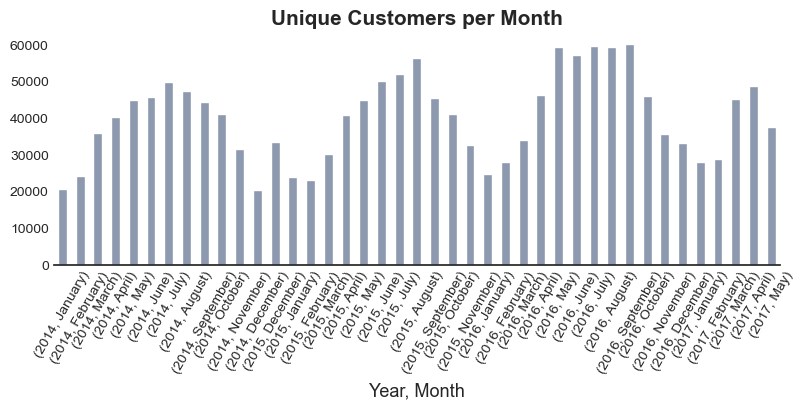

In [58]:
# Plot the monthly distribution of bookings

# Create a bar chart of monthly distribution for all bookings
#fg = sns.barplot(data = monthly_customers, x = ['Year', 'Month'], y ='no_customers')
fg = monthly_customers.plot.bar(figsize = (8,4), color = ['#8D99AE'])
plt.tight_layout()

# remove the top and right spines
fg.spines['top'].set_visible(False)
fg.spines['right'].set_visible(False)
fg.spines['left'].set_visible(False)

#Set titles and axes
plt.xlabel('Year, Month', fontsize = 13)
plt.title('Unique Customers per Month', fontsize = 15, fontweight = 'semibold')
plt.xticks(rotation = 60, fontsize = 10)
plt.yticks(fontsize = 10)  # Remove y-axis tick labels
plt.legend([])

# Display the plot with ticks on the x and y axes
#plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

# Exporting the figure
plt.savefig("customers_per_month.png", bbox_inches='tight') 

plt.show()

### 3.3 Unique Customers by Weekday

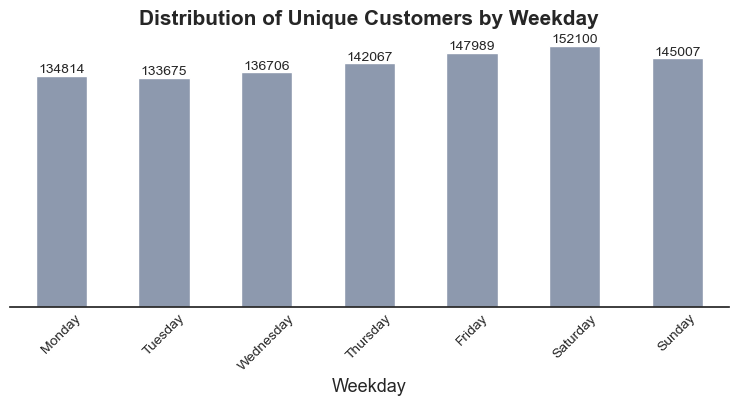

In [59]:
# Plot the weekly distribution

# Define the order of the days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar chart of monthly distribution for all bookings
fg = pd.DataFrame(df_biketrips.groupby('Weekday')['customer_hal_id'].nunique().reindex(day_order)).plot.bar(figsize = (8,4), color = ['#8D99AE'])
plt.tight_layout()
# remove the top and right spines
fg.spines[['top', 'right', 'left']].set_visible(False)

#Set titles and axes
plt.xlabel('Weekday', fontsize = 13)
plt.title('Distribution of Unique Customers by Weekday', fontsize = 15, fontweight = 'semibold')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks([])  # Remove y-axis tick labels
plt.legend([]) # Remove the legend

# Display the plot with ticks on the x and y axes
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=False, right=False)

# Add text annotations for each bar
for bar in fg.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plt.text(x, y, y, ha='center', va='bottom')

# Exporting the correlation heatmap
plt.savefig("bookings_by_day.png", bbox_inches='tight') 

plt.show()

### 3.4 Number of Active Customers

In [60]:
# Group by customer_hal_id and get the last datetime_from for each customer
last_customer_booking = pd.DataFrame(df_biketrips.groupby('customer_hal_id')['datetime_from'].last())

# customers who only made trips up to this date are clasified as inactive
date = pd.to_datetime('2016-05-16')

# Filter customers who were active after the certain date
active_bookings = last_customer_booking[last_customer_booking['datetime_from'] > date]
active_customers = len(active_bookings)

# inactive customers 
inactive_customers = len(last_customer_booking) - active_customers

# calculate the number of new customers last year

new_customers_last_year = last_customer_booking[last_customer_booking['datetime_from'] > date]

print(f'Out of the 262527 total customers {active_customers} ({(active_customers/262527*100):.2f}%) were active customers last year and there were {inactive_customers} ({(inactive_customers/262527*100):.2f}%) inactive customers who did not make any trips')


Out of the 262527 total customers 155354 (59.18%) were active customers last year and there were 107173 (40.82%) inactive customers who did not make any trips


### 3.5 Daily Customers over Time

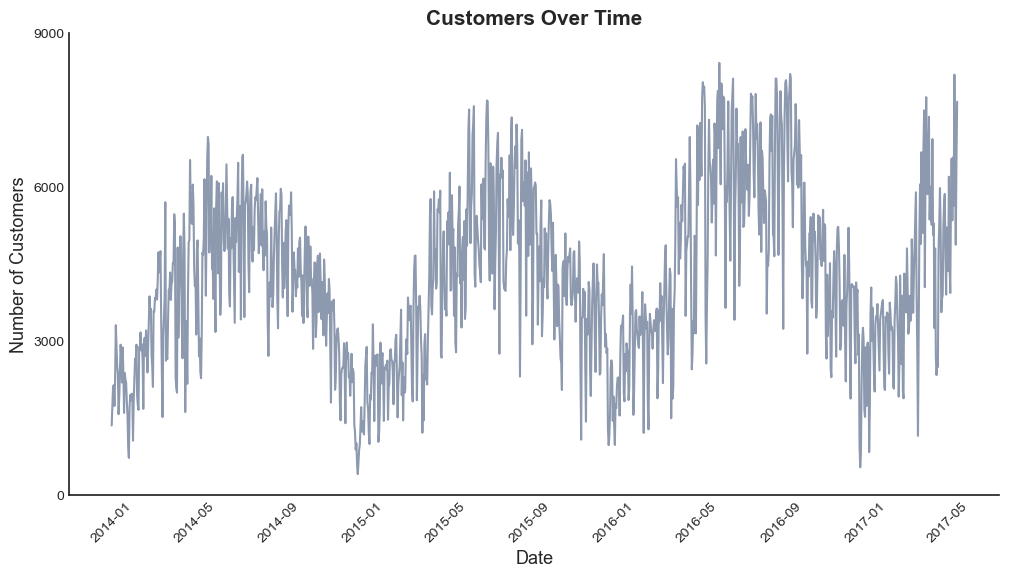

In [61]:
# Group the data by date and calculate the number of bookings for each date
daily_customers = pd.DataFrame(df_biketrips.groupby('date_from')['customer_hal_id'].nunique().reset_index())

# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set_style('white')

# Plot the number of bookings over time
sns.lineplot(data = daily_customers, x = 'date_from', y = 'customer_hal_id', color = '#8D99AE')

# Set labels and title
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Number of Customers', fontsize = 13)
plt.title('Customers Over Time', fontsize = 15, fontweight = 'semibold')
plt.yticks([0, 3000, 6000, 9000],fontsize = 10)

# Display the plot with ticks on the x and y axes
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

# Remove spines (axis lines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Exporting the correlation heatmap
plt.savefig("customers_over_time.png", bbox_inches='tight') 

# Display the plot
plt.show()

## 4. Bike Analysis

### 4.1 No. of Bikes over Time

In [62]:
# Sort the DataFrame by datetime_from column
df_biketrips.sort_values(by='datetime_from', inplace=True)

# Group by bike_hal_id and get the first datetime_from for each bike
first_bike_use =  df_biketrips.groupby('vehicle_hal_id')['datetime_from'].first()

# Group the first bookings by month and count the number of new bikes each month
new_bikes = first_bike_use.dt.to_period('M').value_counts()

In [63]:
# set the index as date and view 
new_bikes.index = new_bikes.index.to_timestamp()
new_bikes

2014-01-01    1431
2015-06-01     271
2014-02-01     158
2015-03-01     141
2016-01-01      86
2016-04-01      84
2016-10-01      82
2016-02-01      71
2016-05-01      64
2015-07-01      44
2014-05-01      42
2015-10-01      38
2016-11-01      34
2014-03-01      22
2015-08-01      17
2017-02-01      14
2014-07-01      13
2015-05-01       9
2017-03-01       9
2014-09-01       8
2016-03-01       7
2015-04-01       7
2016-12-01       5
2015-11-01       4
2016-06-01       3
2014-11-01       3
2014-12-01       3
2014-04-01       3
2015-12-01       2
2017-01-01       2
2014-06-01       2
2014-08-01       1
2015-09-01       1
Name: datetime_from, dtype: int64

In [64]:
# check the sum of the months adds up to the total number 262527

new_bikes.sum()

2681

<Figure size 1200x600 with 0 Axes>

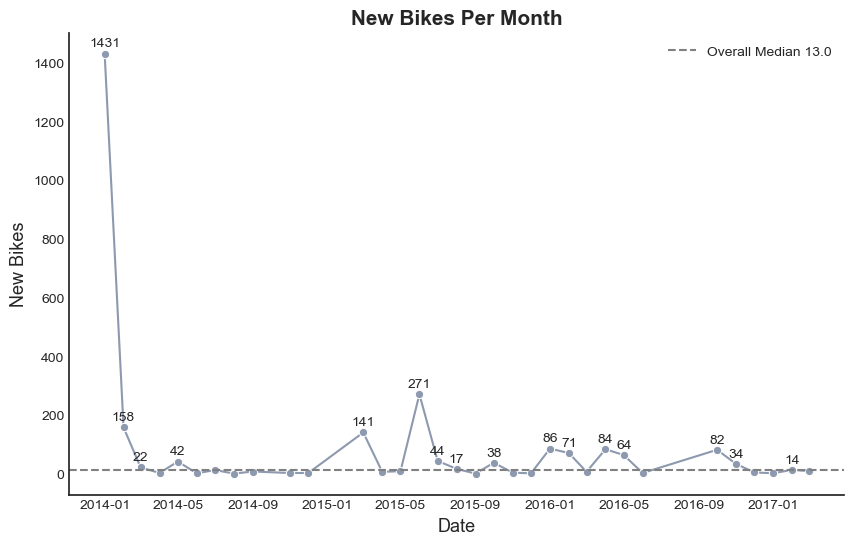

In [65]:
# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set_style('white')
nb_median = new_bikes.median()

# Plot the number of new bikes per month
plt.figure(figsize=(10, 6))
sns.lineplot(data = new_bikes, marker = 'o', color = '#8D99AE')
plt.axhline(y = new_bikes.median(), color = 'grey', linestyle = '--', label = f'Overall Median {nb_median}')
plt.xlabel('Date', fontsize = 13)
plt.ylabel('New Bikes', fontsize = 13)
plt.title('New Bikes Per Month', fontsize = 15, fontweight = 'semibold')
plt.legend()

# Remove the grid and spines (axis lines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(False)

# Identify peak hours or periods of high demand (optional)
peak_months = new_bikes[new_bikes > nb_median]
for month, count in peak_months.items():
    plt.annotate(f'{count}', xy=(month, count), xytext=(0, 5), textcoords='offset points', ha='center', fontsize = 10)
    
# Exporting the correlation heatmap
plt.savefig("new_bikes.png", bbox_inches='tight') 

# Display the plot
plt.show()

### 4.2 New Bikes per Month

In [66]:
# Calculate the distribution of unique customers by month
monthly_bikes = pd.DataFrame(df_biketrips.groupby(['Year', 'Month'], sort = False)['vehicle_hal_id'].nunique())
monthly_bikes.rename(columns = {'vehicle_hal_id' : 'no_bikes'}, inplace = True)
monthly_bikes

no_bikes
Year Month              
2014 January        1431
     February       1583
     March          1604
     April          1599
     May            1632
     June           1517
     July           1527
     August         1471
     September      1454
     October        1381
     November       1335
     December       1381
2015 December       2059
     January        1913
     February       1478
     March          1631
     April          1594
     May            1524
     June           1792
     July           1842
     August         1771
     September      1761
     October        1793
     November       1831
2016 January        2222
     February       1910
     March          1878
     April          1947
     May            1989
     June           1989
     July           2002
     August         1965
     September      1962
     October        2085
     November       2178
     December       2146
2017 January        2129
     February       2110
     March          2417
     April          2508
     May            2377

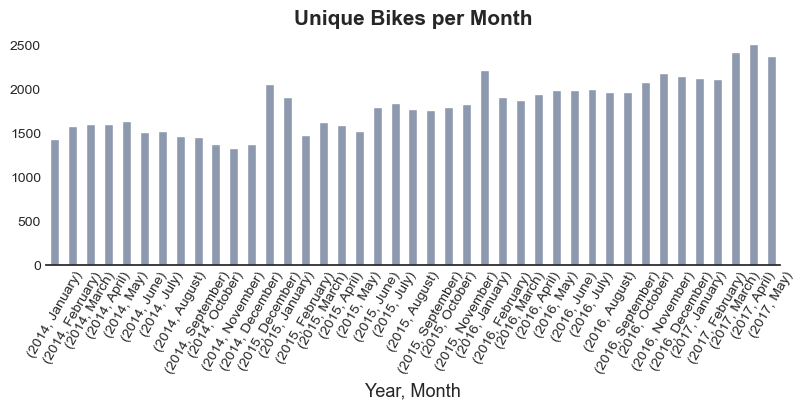

In [67]:
# Plot the monthly distribution of bikes

# Create a bar chart of monthly distribution for all bookings
fg = monthly_bikes.plot.bar(figsize = (8,4), color = ['#8D99AE'])
plt.tight_layout()

# remove the top and right spines
fg.spines['top'].set_visible(False)
fg.spines['right'].set_visible(False)
fg.spines['left'].set_visible(False)

#Set titles and axes
plt.xlabel('Year, Month', fontsize = 13)
plt.title('Unique Bikes per Month', fontsize = 15, fontweight = 'semibold')
plt.xticks(rotation = 60, fontsize = 10)
plt.yticks(fontsize = 10)  # Remove y-axis tick labels
plt.legend([])

# Display the plot with ticks on the x and y axes
#plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

# Exporting the figure
plt.savefig("bikes_per_month.png", bbox_inches='tight') 

plt.show()

### 4.3 Total No. of Bikes

In [68]:
# Plot the weekly bike distribution

# Calculate the distribution of bikes by year
year_bikes = pd.DataFrame(df_biketrips.groupby(['Year'], sort = False)['vehicle_hal_id'].nunique())
year_bikes.rename(columns = {'vehicle_hal_id' : 'no_bikes'}, inplace = True)
year_bikes

,no_bikes
Year,
2014,1686
2015,2147
2016,2560
2017,2576


## 5. Time Series Analysis

### 5.1 Monthly Bookings

Smooth the data by grouping by the average number of bookings per month

In [69]:
# Create a new dataframe month using the daily dataframe 

# Set the index to the date_from column 
daily.set_index('date_from', inplace = True)

# Group the bookings by month and calculate the mean
month = daily.resample('M').mean().round()
month.head(25)

,booking_hal_id
date_from,
2014-01-31,3057.0
2014-02-28,4039.0
2014-03-31,5775.0
2014-04-30,6860.0
2014-05-31,7443.0
2014-06-30,8074.0
2014-07-31,8872.0
2014-08-31,7931.0
2014-09-30,7615.0


In [70]:
# Check the shape of the data

month.shape

(41, 1)

In [71]:
# Check for missing values
month.isnull().sum() 

booking_hal_id    0
dtype: int64

In [72]:
# Check the mean and median
month.describe()

,booking_hal_id
count,41.000000
mean,6735.097561
std,2354.818409
min,2716.000000
25%,4743.000000
50%,6860.000000
75%,8074.000000
max,11040.000000


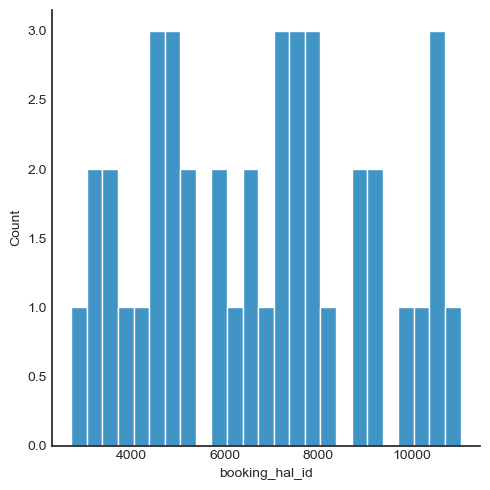

In [73]:
# Check the distribution

sns.displot(month['booking_hal_id'], bins=25) 

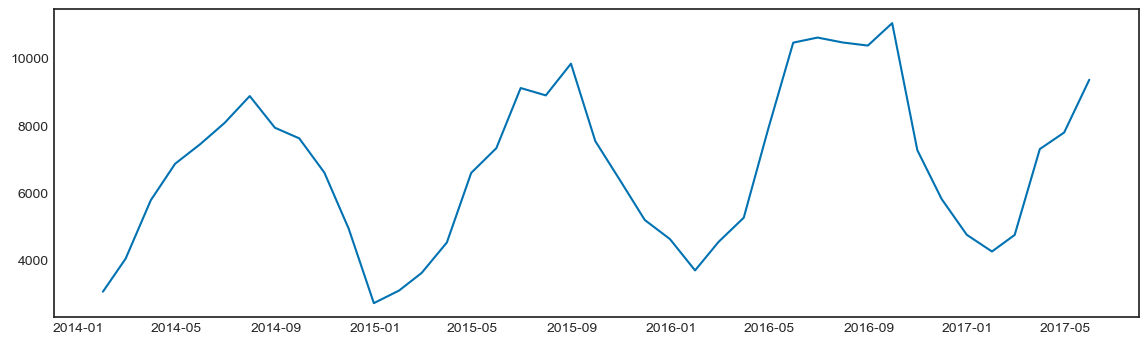

In [74]:
# Plot the data using matplotlib.

plt.figure(figsize=(14,4), dpi=100) 

plt.plot(month)

In [75]:
# Decompose the time series using an additive model

decomposition_month = sm.tsa.seasonal_decompose(month, model = 'multiplicative')

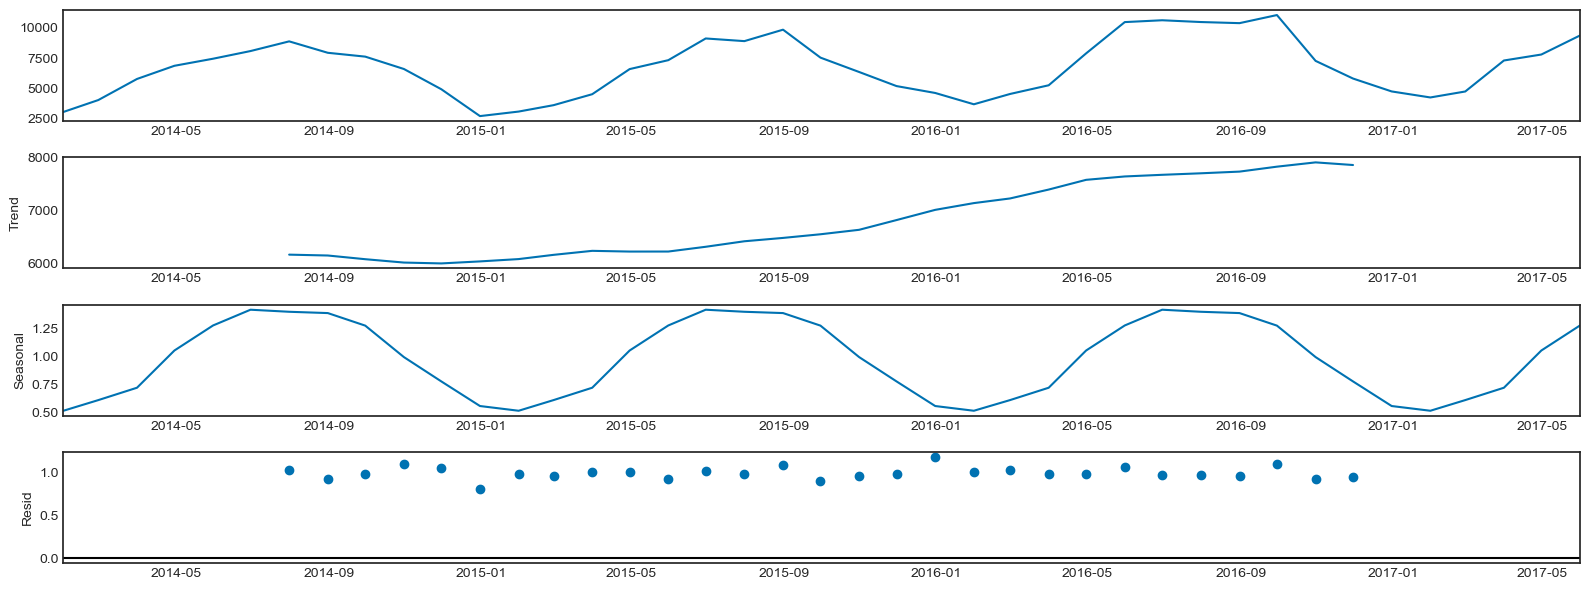

In [76]:
# Plot the separate components

decomposition_month.plot()

plt.savefig('Monthly_decomposition.png',bbox_inches='tight')

**Overall there is an increasing trend with the number of bookings gradually rising over the years from 2014 to the end of 2016. The residual noise level is mostly around 1, so may have an impact on the trend.<br>
The data has seasonality with the number of bookings increasing from February up to June/July then remaining steady until September.  The bookings then drop off until the end February.** <br>
*The presence of a trend and seasonality implies that the data is non-stationary*

In [77]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(month['booking_hal_id'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.160937
p-value                         0.969984
Number of Lags Used             8.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


The Critical Value (5%) of -2.957219 is much smaller than the test statistic 0.160937, therefore the null hypothesis can't be rejected. Can't disprove the null = no unit root = stationary data = can proceed with forecast.

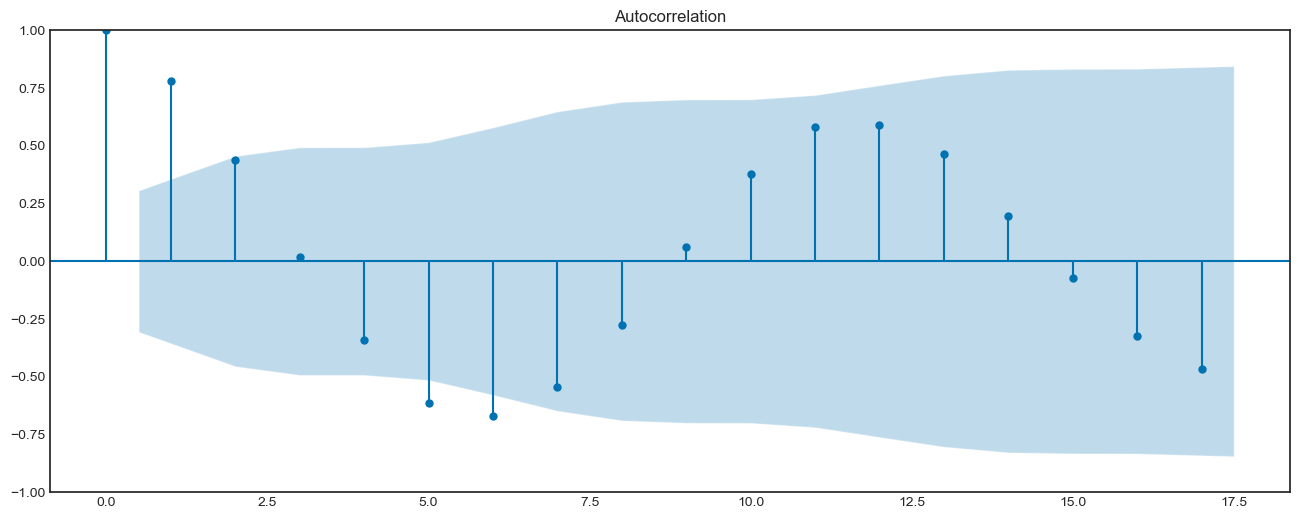

In [78]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(month)
plt.show()

**Three points fall outwith the blue area - therefore assume the data is stationary, but the stationarity is weak**

### 5.2 Monthly Customers

In [79]:
# Create a new dataframe month using the daily dataframe 

# Set the index to the date_from column 
daily_customers.set_index('date_from', inplace = True)

# Group the bookings by month and calculate the mean
month_cust = daily_customers.resample('M').mean().round()
month_cust.head(25)

,customer_hal_id
date_from,
2014-01-31,2072.0
2014-02-28,2674.0
2014-03-31,3660.0
2014-04-30,4233.0
2014-05-31,4579.0
2014-06-30,4994.0
2014-07-31,5359.0
2014-08-31,4720.0
2014-09-30,4761.0


In [80]:
# Check the shape of the data

month_cust.shape

(41, 1)

In [81]:
# Check for missing values
month_cust.isnull().sum() 

customer_hal_id    0
dtype: int64

In [82]:
# Check the mean and median
month_cust.describe()

,customer_hal_id
count,41.000000
mean,4251.219512
std,1330.450497
min,1892.000000
25%,3189.000000
50%,4233.000000
75%,5004.000000
max,6774.000000


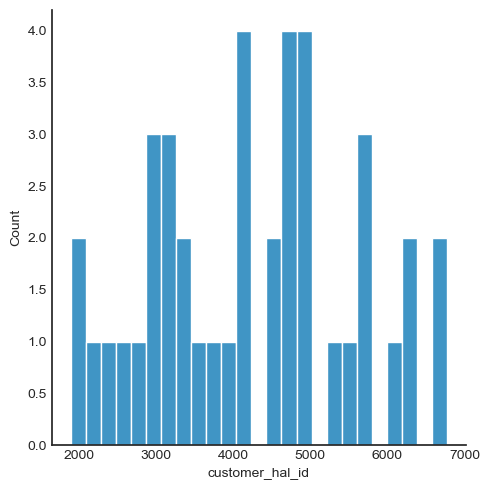

In [83]:
# Check the distribution

sns.displot(month_cust['customer_hal_id'], bins=25) 

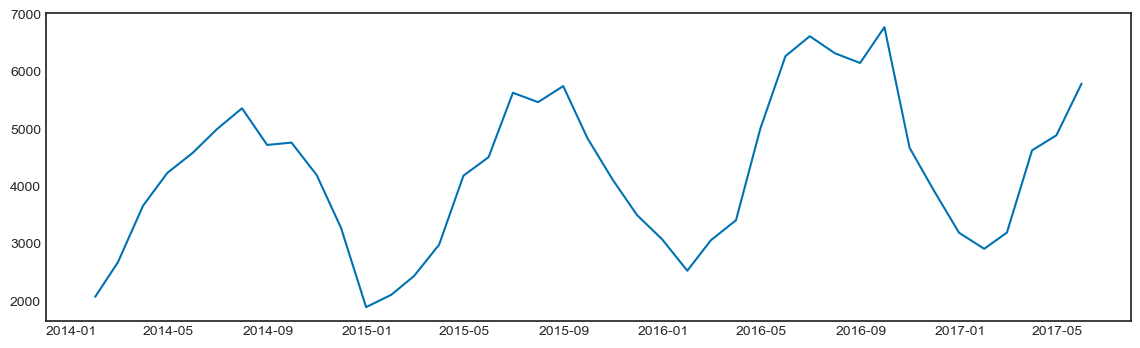

In [84]:
# Plot the data using matplotlib.

plt.figure(figsize=(14,4), dpi=100) 

plt.plot(month_cust)

In [85]:
# Decompose the time series using an additive model

decomposition_month_cust = sm.tsa.seasonal_decompose(month_cust, model = 'multiplicative')

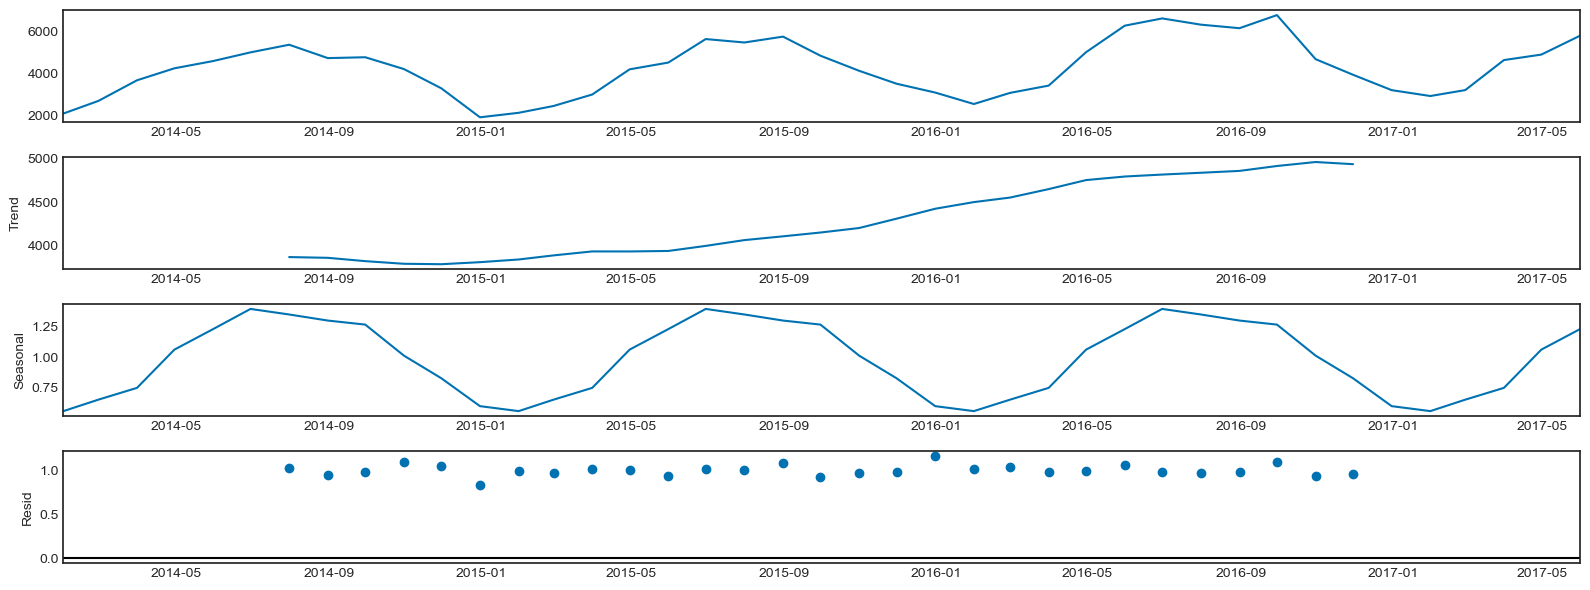

In [86]:
# Plot the separate components

decomposition_month_cust.plot()

plt.savefig('Month_cust_decomposition.png',bbox_inches='tight')

**Overall there is an increasing trend with the number of unique customers gradually rising over the years from 2014 to the end of 2016. The residual noise level is mostly around 1, so may have an impact on the trend.<br>
The data has seasonality with the number of bookings increasing from February up to June/July then remaining steady until September.  The bookings then drop off until the end February.** <br>
*The presence of a trend and seasonality implies that the data is non-stationary*

In [87]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(month_cust['customer_hal_id'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.353980
p-value                         0.979690
Number of Lags Used             9.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


The Critical Value (5%) of -2.960525 is much smaller than the test statistic 0.353980, therefore the null hypothesis can't be rejected. Can't disprove the null = no unit root = stationary data = can proceed with forecast.

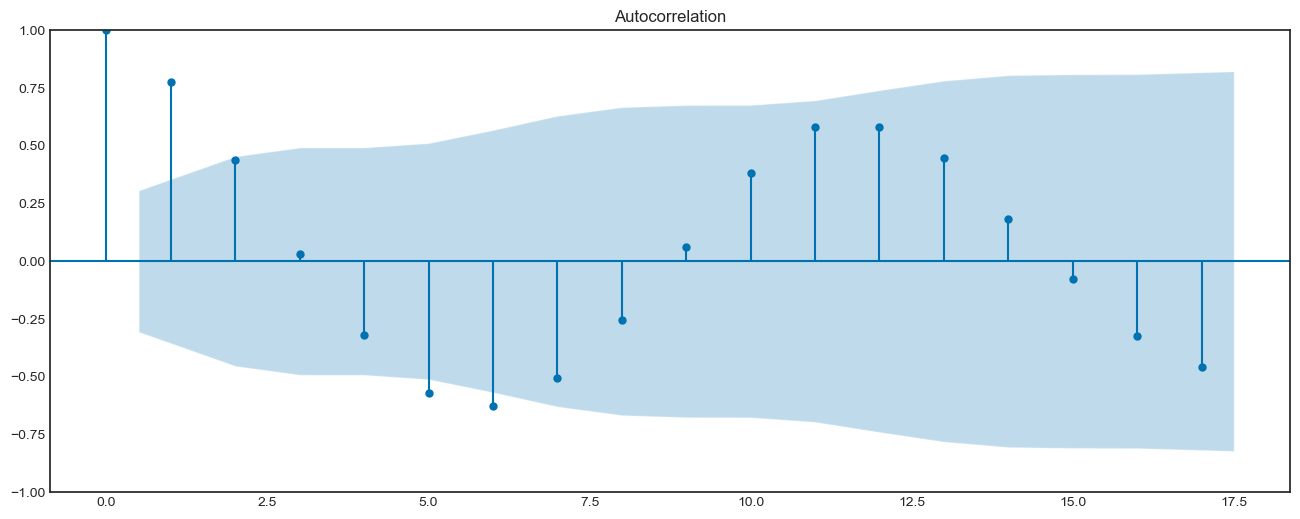

In [88]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(month_cust)
plt.show()

**Three points fall outwith the blue area - therefore assume the data is stationary, but the stationarity is weak**

## 6. Trip Duration

### 6.1 Average Trip Duration By Month 

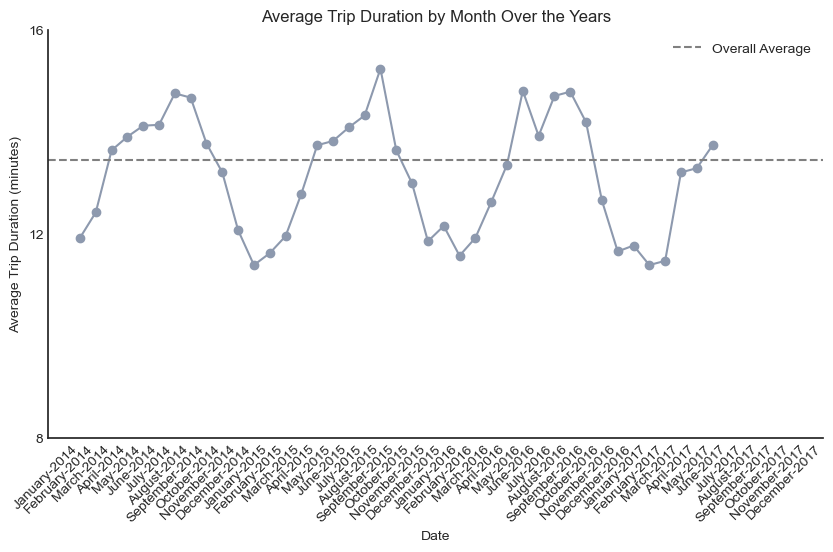

In [89]:
# Calculate the average trip duration per month for each year
# Define the correct order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'Month' column to categorical with the specified order
df_biketrips['Month'] = pd.Categorical(df_biketrips['Month'], categories=month_order, ordered=True)

average_duration = df_biketrips.groupby(['Year', 'Month'])['duration_trip_minutes'].median()

# Reset the index to convert the grouped data into a DataFrame
average_duration = average_duration.reset_index()

# Calculate the overall average trip duration
overall_average = df_biketrips['duration_trip_minutes'].median()

# Plot the average trip duration over months by years
plt.figure(figsize=(10, 6))
plt.plot(average_duration.index, average_duration['duration_trip_minutes'], color = '#8D99AE', marker='o')
plt.axhline(y=overall_average, color='grey', linestyle='--', label='Overall Average')
plt.xlabel('Date')
plt.ylabel('Average Trip Duration (minutes)')
plt.title('Average Trip Duration by Month Over the Years')
plt.legend()

# Format the x-axis to show month and year
plt.gcf().autofmt_xdate()
    
# Remove spines (axis lines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Rotate x-axis labels for better readability 
# Set the x-axis ticks and labels
plt.xticks(range(len(average_duration)), [f"{month}-{year}" for year, month in zip(average_duration['Year'], average_duration['Month'])], rotation=45)
#plt.xticks(rotation=45)
plt.yticks([8, 12, 16],fontsize = 10)

# Exporting the correlation heatmap
plt.savefig("duration_month_year.png", bbox_inches='tight') 

# Display the plot
plt.show()


### 6.2 Average Trip Duration By Weekday 

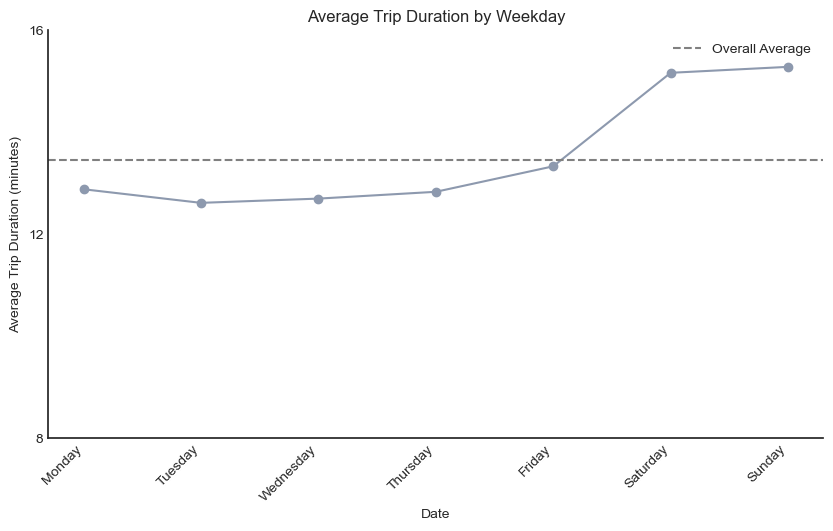

In [90]:
# Convert 'Weekday' column to categorical with the specified order

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_biketrips['Weekday'] = pd.Categorical(df_biketrips['Weekday'], categories=day_order, ordered=True)

duration_weekday = df_biketrips.groupby(['Weekday'])['duration_trip_minutes'].median()

# Reset the index to convert the grouped data into a DataFrame
duration_weekday = duration_weekday.reset_index()

# Plot the average trip duration over months by years
plt.figure(figsize=(10, 6))
plt.plot(duration_weekday.index, duration_weekday['duration_trip_minutes'], color = '#8D99AE', marker='o')
plt.axhline(y=overall_average, color='grey', linestyle='--', label='Overall Average')
plt.xlabel('Date')
plt.ylabel('Average Trip Duration (minutes)')
plt.title('Average Trip Duration by Weekday')
plt.legend()

# Format the x-axis to show month and year
plt.gcf().autofmt_xdate()
    
# Remove spines (axis lines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Rotate x-axis labels for better readability 
# Set the x-axis ticks and labels
plt.xticks(range(len(duration_weekday)), [f"{weekday}" for weekday in duration_weekday['Weekday']], rotation=45)
#plt.xticks(rotation=45)
plt.yticks([8, 12, 16],fontsize = 10)

# Exporting the correlation heatmap
plt.savefig("duration_weekday.png", bbox_inches='tight') 

# Display the plot
plt.show()

### 6.3 Average Trip Duration By Hour 

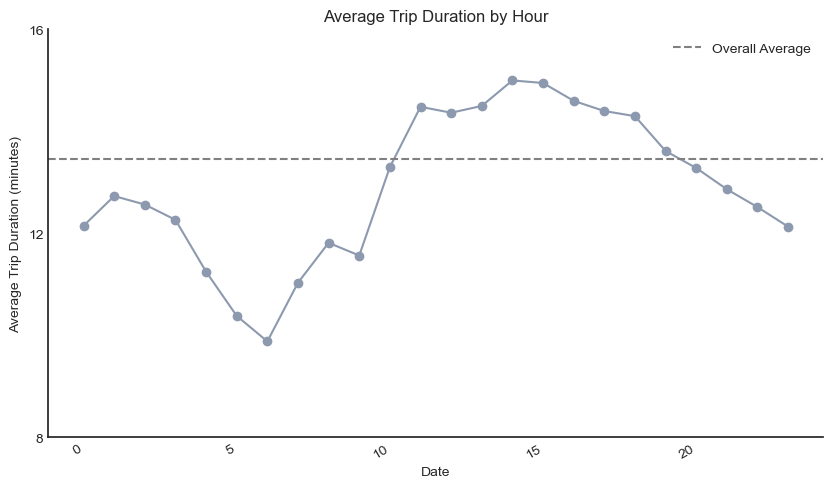

In [91]:
# Convert 'Month' column to categorical with the specified order

duration_hour = df_biketrips.groupby(['hour_from'])['duration_trip_minutes'].median()

# Reset the index to convert the grouped data into a DataFrame
duration_hour = duration_hour.reset_index()

# Plot the average trip duration over months by years
plt.figure(figsize=(10, 6))
plt.plot(duration_hour.index, duration_hour['duration_trip_minutes'], color = '#8D99AE', marker='o')
plt.axhline(y=overall_average, color='grey', linestyle='--', label='Overall Average')
plt.xlabel('Date')
plt.ylabel('Average Trip Duration (minutes)')
plt.title('Average Trip Duration by Hour')
plt.legend()

# Format the x-axis to show month and year
plt.gcf().autofmt_xdate()
    
# Remove spines (axis lines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Rotate x-axis labels for better readability 
# Set the x-axis ticks and labels
plt.xticks()
plt.yticks([8, 12, 16],fontsize = 10)

# Exporting the correlation heatmap
plt.savefig("duration_hour.png", bbox_inches='tight') 

# Display the plot
plt.show()